# Health Exploration and Analytics
SoftUni.bg Data Science - November 2017 course project

Ognian Dantchev

## Abstract
An attempt to visualize and interpret 13 indicators for demographics and economics and 9 indicators for health from the Gapminder World data is presented.  Basic correlations are evaluated to help answer the original project questions "What makes us sick?" and "How does the environment we live in influence our health?".  Python 3 functions are implemented for the visualization of: two variables for all countries over time (animated GIF), choropleth for one variable all countries over the world map and one vatiable over time for a given list of countries.

## 1. Gapminder data: demographics and economics 
Question: **How do economical factors influence health across countries?**


In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import glob
import imageio
from IPython.display import Image

import json
#import geopandas as gpd
import folium


In [3]:
sns.set_style("white")
plt.style.use("seaborn-paper")
MY_DPI= 96


In [4]:
data_dir1= '1. EconomicsAndDemographics'
data_dir2= '2. FoodAndDrink'

data_files_list1= glob.glob(data_dir1+'/*.xlsx')
data_files_list2= glob.glob(data_dir2+'/*.xlsx')

# clean the list from the temp file created by Excel, if oppened
# cleaned_list = [ x for x in some_list if x is not thing ]
data_files_list1 = [ x for x in data_files_list1 if "~$" not in x ]

data_files_list2 = [ x for x in data_files_list2 if "~$" not in x ]


col_list1= []
for s in data_files_list1:
    s = s.replace(data_dir1, '')
    s = s.replace('.xlsx', '')
    s = s.replace('/', '')
    col_list1.append(s)
    
col_list2= []
for s in data_files_list2:
    s = s.replace(data_dir2, '')
    s = s.replace('.xlsx', '')
    s = s.replace('/', '')
    col_list2.append(s)
    
# prints the list of the file names and the variable names for the two datasets
print(data_dir1)
print(data_files_list1, '\n', col_list1, '\n', len(col_list1))
print(data_dir2)
print(data_files_list2, '\n', col_list2, '\n', len(col_list2))


1. EconomicsAndDemographics
['1. EconomicsAndDemographics/agriculture_gdp_pct.xlsx', '1. EconomicsAndDemographics/carbon_dioxide_emissions_per_capita.xlsx', '1. EconomicsAndDemographics/coal_consumption_per_capita.xlsx', '1. EconomicsAndDemographics/electricity_consumption_per_capita.xlsx', '1. EconomicsAndDemographics/gdp_per_capita.xlsx', '1. EconomicsAndDemographics/industry_gdp_pct.xlsx', '1. EconomicsAndDemographics/life_expectancy_at_birth.xlsx', '1. EconomicsAndDemographics/services_gdp_pct.xlsx', '1. EconomicsAndDemographics/suicide_per_10k.xlsx', '1. EconomicsAndDemographics/total_health_expenditure_gdp_pct.xlsx', '1. EconomicsAndDemographics/under_five_mortality_rate.xlsx', '1. EconomicsAndDemographics/urban_population_pct.xlsx', '1. EconomicsAndDemographics/water_withdrawal_per_capita.xlsx'] 
 ['agriculture_gdp_pct', 'carbon_dioxide_emissions_per_capita', 'coal_consumption_per_capita', 'electricity_consumption_per_capita', 'gdp_per_capita', 'industry_gdp_pct', 'life_expectan

In [5]:
# now generate some code: read from the files
# filenames in col_list1 will be used as dataframe names

labels_list1 = []
load_list1_files = ""
reindex_list1 = ""
for i in range(0, len(col_list1)):
    t= col_list1[i] + '.columns[0]'
    load_list1_files += col_list1[i] + ' = pd.read_excel(\'' + data_files_list1[i] 
    load_list1_files += '\', sheetname=0, header=0)\n' + 'labels_list1.append(' +  t + ')\n' 
    load_list1_files += col_list1[i] + ' = ' + col_list1[i] + '.rename( columns={' + t + ': \'country\'})\n' 
    load_list1_files += col_list1[i] + ' = pd.melt(' + col_list1[i] 
    load_list1_files += ', id_vars=[\'country\'], var_name= \'year\',  value_name=\'' + col_list1[i] + '\')\n' 
    load_list1_files += col_list1[i] + ' = ' + col_list1[i] + '.dropna()\n\n'
        
    #the old version, for just in case
    #print(col_list1[i], ' = pd.read_excel(\'' + data_files_list1[i] + '\', sheetname=0, header=0)' )

    #t= col_list1[i] + '.columns[0]'
    #print('labels_list1.append(' +  t + ')')
    #print(col_list1[i] + ' = ' + col_list1[i] + '.rename( columns={' + t + ': \'country\'})')
    
    #print(col_list1[i] + ' = pd.melt(' + col_list1[i] + 
    #      ', id_vars=[\'country\'], var_name= \'year\',  value_name=\'' + col_list1[i] + '\')')
    
    #print(col_list1[i] + ' = ' + col_list1[i] + '.dropna()')
    #print('')
    
    reindex_list1 = reindex_list1 + col_list1[i] + '.set_index("country", inplace=True)\n' 
    


Manually execute the above generated code:

In [6]:
exec(load_list1_files)

#from the old version that was using print and manual execution vs exec() now
agriculture_gdp_pct  = pd.read_excel('1. EconomicsAndDemographics/agriculture_gdp_pct.xlsx', sheetname=0, header=0)
labels_list1.append(agriculture_gdp_pct.columns[0])
agriculture_gdp_pct = agriculture_gdp_pct.rename( columns={agriculture_gdp_pct.columns[0]: 'country'})
agriculture_gdp_pct = pd.melt(agriculture_gdp_pct, id_vars=['country'], var_name= 'year',  value_name='agriculture_gdp_pct')
agriculture_gdp_pct = agriculture_gdp_pct.dropna()

carbon_dioxide_emissions_per_capita  = pd.read_excel('1. EconomicsAndDemographics/carbon_dioxide_emissions_per_capita.xlsx', sheetname=0, header=0)
labels_list1.append(carbon_dioxide_emissions_per_capita.columns[0])
carbon_dioxide_emissions_per_capita = carbon_dioxide_emissions_per_capita.rename( columns={carbon_dioxide_emissions_per_capita.columns[0]: 'country'})
carbon_dioxide_emissions_per_capita = pd.melt(carbon_dioxide_emissions_per_capita, id_vars=['country'], var_name= 'year',  value_name='carbon_dioxide_emissions_per_capita')
carbon_dioxide_emissions_per_capita = carbon_dioxide_emissions_per_capita.dropna()

coal_consumption_per_capita  = pd.read_excel('1. EconomicsAndDemographics/coal_consumption_per_capita.xlsx', sheetname=0, header=0)
labels_list1.append(coal_consumption_per_capita.columns[0])
coal_consumption_per_capita = coal_consumption_per_capita.rename( columns={coal_consumption_per_capita.columns[0]: 'country'})
coal_consumption_per_capita = pd.melt(coal_consumption_per_capita, id_vars=['country'], var_name= 'year',  value_name='coal_consumption_per_capita')
coal_consumption_per_capita = coal_consumption_per_capita.dropna()

electricity_consumption_per_capita  = pd.read_excel('1. EconomicsAndDemographics/electricity_consumption_per_capita.xlsx', sheetname=0, header=0)
labels_list1.append(electricity_consumption_per_capita.columns[0])
electricity_consumption_per_capita = electricity_consumption_per_capita.rename( columns={electricity_consumption_per_capita.columns[0]: 'country'})
electricity_consumption_per_capita = pd.melt(electricity_consumption_per_capita, id_vars=['country'], var_name= 'year',  value_name='electricity_consumption_per_capita')
electricity_consumption_per_capita = electricity_consumption_per_capita.dropna()

gdp_per_capita  = pd.read_excel('1. EconomicsAndDemographics/gdp_per_capita.xlsx', sheetname=0, header=0)
labels_list1.append(gdp_per_capita.columns[0])
gdp_per_capita = gdp_per_capita.rename( columns={gdp_per_capita.columns[0]: 'country'})
gdp_per_capita = pd.melt(gdp_per_capita, id_vars=['country'], var_name= 'year',  value_name='gdp_per_capita')
gdp_per_capita = gdp_per_capita.dropna()

industry_gdp_pct  = pd.read_excel('1. EconomicsAndDemographics/industry_gdp_pct.xlsx', sheetname=0, header=0)
labels_list1.append(industry_gdp_pct.columns[0])
industry_gdp_pct = industry_gdp_pct.rename( columns={industry_gdp_pct.columns[0]: 'country'})
industry_gdp_pct = pd.melt(industry_gdp_pct, id_vars=['country'], var_name= 'year',  value_name='industry_gdp_pct')
industry_gdp_pct = industry_gdp_pct.dropna()

life_expectancy_at_birth  = pd.read_excel('1. EconomicsAndDemographics/life_expectancy_at_birth.xlsx', sheetname=0, header=0)
labels_list1.append(life_expectancy_at_birth.columns[0])
life_expectancy_at_birth = life_expectancy_at_birth.rename( columns={life_expectancy_at_birth.columns[0]: 'country'})
life_expectancy_at_birth = pd.melt(life_expectancy_at_birth, id_vars=['country'], var_name= 'year',  value_name='life_expectancy_at_birth')
life_expectancy_at_birth = life_expectancy_at_birth.dropna()

services_gdp_pct  = pd.read_excel('1. EconomicsAndDemographics/services_gdp_pct.xlsx', sheetname=0, header=0)
labels_list1.append(services_gdp_pct.columns[0])
services_gdp_pct = services_gdp_pct.rename( columns={services_gdp_pct.columns[0]: 'country'})
services_gdp_pct = pd.melt(services_gdp_pct, id_vars=['country'], var_name= 'year',  value_name='services_gdp_pct')
services_gdp_pct = services_gdp_pct.dropna()

suicide_per_10k  = pd.read_excel('1. EconomicsAndDemographics/suicide_per_10k.xlsx', sheetname=0, header=0)
labels_list1.append(suicide_per_10k.columns[0])
suicide_per_10k = suicide_per_10k.rename( columns={suicide_per_10k.columns[0]: 'country'})
suicide_per_10k = pd.melt(suicide_per_10k, id_vars=['country'], var_name= 'year',  value_name='suicide_per_10k')
suicide_per_10k = suicide_per_10k.dropna()

total_health_expenditure_gdp_pct  = pd.read_excel('1. EconomicsAndDemographics/total_health_expenditure_gdp_pct.xlsx', sheetname=0, header=0)
labels_list1.append(total_health_expenditure_gdp_pct.columns[0])
total_health_expenditure_gdp_pct = total_health_expenditure_gdp_pct.rename( columns={total_health_expenditure_gdp_pct.columns[0]: 'country'})
total_health_expenditure_gdp_pct = pd.melt(total_health_expenditure_gdp_pct, id_vars=['country'], var_name= 'year',  value_name='total_health_expenditure_gdp_pct')
total_health_expenditure_gdp_pct = total_health_expenditure_gdp_pct.dropna()

under_five_mortality_rate  = pd.read_excel('1. EconomicsAndDemographics/under_five_mortality_rate.xlsx', sheetname=0, header=0)
labels_list1.append(under_five_mortality_rate.columns[0])
under_five_mortality_rate = under_five_mortality_rate.rename( columns={under_five_mortality_rate.columns[0]: 'country'})
under_five_mortality_rate = pd.melt(under_five_mortality_rate, id_vars=['country'], var_name= 'year',  value_name='under_five_mortality_rate')
under_five_mortality_rate = under_five_mortality_rate.dropna()

urban_population_pct  = pd.read_excel('1. EconomicsAndDemographics/urban_population_pct.xlsx', sheetname=0, header=0)
labels_list1.append(urban_population_pct.columns[0])
urban_population_pct = urban_population_pct.rename( columns={urban_population_pct.columns[0]: 'country'})
urban_population_pct = pd.melt(urban_population_pct, id_vars=['country'], var_name= 'year',  value_name='urban_population_pct')
urban_population_pct = urban_population_pct.dropna()

water_withdrawal_per_capita  = pd.read_excel('1. EconomicsAndDemographics/water_withdrawal_per_capita.xlsx', sheetname=0, header=0)
labels_list1.append(water_withdrawal_per_capita.columns[0])
water_withdrawal_per_capita = water_withdrawal_per_capita.rename( columns={water_withdrawal_per_capita.columns[0]: 'country'})
water_withdrawal_per_capita = pd.melt(water_withdrawal_per_capita, id_vars=['country'], var_name= 'year',  value_name='water_withdrawal_per_capita')
water_withdrawal_per_capita = water_withdrawal_per_capita.dropna()

In [7]:
# will try to generate a string (not print) and
#  use exec() here (vs. copy/paste/execute the cell)

In [8]:
# A1 cell in each file has the units of measurement of the respective variable.  keep these as they might be useful.
labels_list1

['Agriculture, value added (% of GDP)',
 'CO2 per capita',
 'Coal Consumption per person (tonnes oil equivalent)',
 'Electricity consumption, per capita (kWh)',
 'GDP per capita',
 'Industry, value added (% of GDP)',
 'Life expectancy',
 'Services, etc., value added (% of GDP)',
 'Suicide, age adjusted, per 100 000 standard population',
 'Total expenditure on health as percentage of GDP (gross domestic product)',
 'CME under 5 mortality',
 'Urban population (% of total)',
 'Total water withdrawal per capita (m3/inhab/yr)']

In [9]:
water_withdrawal_per_capita.head()

country  year  water_withdrawal_per_capita
17   Barbados  1962                     129.1480
446   Uruguay  1967                     236.4620
458   Algeria  1972                     136.9800
533     Ghana  1972                      31.4100
554    Israel  1972                     508.9904

In [10]:
col_list1

['agriculture_gdp_pct',
 'carbon_dioxide_emissions_per_capita',
 'coal_consumption_per_capita',
 'electricity_consumption_per_capita',
 'gdp_per_capita',
 'industry_gdp_pct',
 'life_expectancy_at_birth',
 'services_gdp_pct',
 'suicide_per_10k',
 'total_health_expenditure_gdp_pct',
 'under_five_mortality_rate',
 'urban_population_pct',
 'water_withdrawal_per_capita']

In [11]:
life_expectancy_at_birth.info()
#gdp_per_capita.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 43857 entries, 1 to 56419
Data columns (total 3 columns):
country                     43857 non-null object
year                        43857 non-null object
life_expectancy_at_birth    43857 non-null float64
dtypes: float64(1), object(2)
memory usage: 1.3+ MB


In [12]:
life_expectancy_at_birth[['year']] = life_expectancy_at_birth[['year']].apply(pd.to_numeric)

In [13]:
life_expectancy_at_birth.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43857 entries, 1 to 56419
Data columns (total 3 columns):
country                     43857 non-null object
year                        43857 non-null int64
life_expectancy_at_birth    43857 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.3+ MB


It seems life_expectancy_at_birth is the most complete variable file, will use it as a basis for Left merge

In [14]:
#agriculture_gdp_pct[agriculture_gdp_pct['country'] == 'Albania']
agriculture_gdp_pct.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6361 entries, 19 to 13757
Data columns (total 3 columns):
country                6361 non-null object
year                   6361 non-null object
agriculture_gdp_pct    6361 non-null float64
dtypes: float64(1), object(2)
memory usage: 198.8+ KB


In [15]:
# after many failures to merge the columns, found that 'year' in some of the files is str, so some corrections:
agriculture_gdp_pct[['year']] = agriculture_gdp_pct[['year']].apply(pd.to_numeric)

In [16]:
services_gdp_pct[['year']] = services_gdp_pct[['year']].apply(pd.to_numeric)
industry_gdp_pct[['year']] = industry_gdp_pct[['year']].apply(pd.to_numeric)

In [17]:
# same for the electricity_consumption_per_capita file
electricity_consumption_per_capita[['year']] = electricity_consumption_per_capita[['year']].apply(pd.to_numeric)

In [18]:
# merge all of the data from 1. Economics And Demographics into one dataframe named df3
# looking at the data set files, I assume life_expectancy_at_birth is the biggest set, with 216 or so years
# start with it and LEFT merge
# df1 and df2 are temporary variables
df1 = pd.merge(life_expectancy_at_birth, agriculture_gdp_pct, left_on=['country', 'year'], right_on=['country', 'year'], how='left')

In [19]:
df2= pd.merge(df1, industry_gdp_pct, left_on=['country', 'year'], right_on=['country', 'year'], how='left')

In [20]:
df3= pd.merge(df2, gdp_per_capita, left_on=['country', 'year'], right_on=['country', 'year'], how='left')

In [21]:
df1 = pd.merge(df3, services_gdp_pct, left_on=['country', 'year'], right_on=['country', 'year'], how='left')
df2 = pd.merge(df1, carbon_dioxide_emissions_per_capita, left_on=['country', 'year'], right_on=['country', 'year'], how='left')
df3 = pd.merge(df2, coal_consumption_per_capita, left_on=['country', 'year'], right_on=['country', 'year'], how='left')

df1 = pd.merge(df3, electricity_consumption_per_capita, left_on=['country', 'year'], right_on=['country', 'year'], how='left')
df2 = pd.merge(df1, suicide_per_10k, left_on=['country', 'year'], right_on=['country', 'year'], how='left')
df3 = pd.merge(df2, total_health_expenditure_gdp_pct, left_on=['country', 'year'], right_on=['country', 'year'], how='left')

df1 = pd.merge(df3, under_five_mortality_rate, left_on=['country', 'year'], right_on=['country', 'year'], how='left')
df2 = pd.merge(df1, urban_population_pct, left_on=['country', 'year'], right_on=['country', 'year'], how='left')
df3 = pd.merge(df2, water_withdrawal_per_capita, left_on=['country', 'year'], right_on=['country', 'year'], how='left')


In [22]:
df3

country  year  life_expectancy_at_birth  \
0                 Afghanistan  1800                     28.21   
1                     Albania  1800                     35.40   
2                     Algeria  1800                     28.82   
3                      Angola  1800                     26.98   
4         Antigua and Barbuda  1800                     33.54   
5                   Argentina  1800                     33.20   
6                     Armenia  1800                     34.00   
7                       Aruba  1800                     34.42   
8                   Australia  1800                     34.05   
9                     Austria  1800                     34.40   
10                 Azerbaijan  1800                     29.17   
11                    Bahamas  1800                     35.18   
12                    Bahrain  1800                     30.30   
13                 Bangladesh  1800                     25.50   
14                   Barbados  1800                     32.12   
15                    Belarus  1800                     36.20   
16                    Belgium  1800                     40.00   
17                     Belize  1800                     26.50   
18                      Benin  1800                     31.00   
19                     Bhutan  1800                     28.80   
20                    Bolivia  1800                     33.00   
21     Bosnia and Herzegovina  1800                     35.10   
22                   Botswana  1800                     33.60   
23                     Brazil  1800                     32.00   
24                     Brunei  1800                     29.20   
25                   Bulgaria  1800                     35.80   
26               Burkina Faso  1800                     29.20   
27                    Burundi  1800                     31.50   
28                   Cambodia  1800                     35.00   
29                   Cameroon  1800                     28.75   
...                       ...   ...                       ...   
43827             Switzerland  2016                     83.10   
43828                   Syria  2016                     69.21   
43829                  Taiwan  2016                     79.60   
43830              Tajikistan  2016                     72.90   
43831                Tanzania  2016                     64.91   
43832                Thailand  2016                     74.80   
43833             Timor-Leste  2016                     72.50   
43834                    Togo  2016                     61.90   
43835                   Tonga  2016                     71.70   
43836     Trinidad and Tobago  2016                     72.50   
43837                 Tunisia  2016                     77.60   
43838                  Turkey  2016                     79.30   
43839            Turkmenistan  2016                     70.40   
43840                  Uganda  2016                     61.91   
43841                 Ukraine  2016                     71.70   
43842    United Arab Emirates  2016                     75.40   
43843          United Kingdom  2016                     81.10   
43844           United States  2016                     79.10   
43845                 Uruguay  2016                     77.00   
43846              Uzbekistan  2016                     72.10   
43847                 Vanuatu  2016                     65.10   
43848               Venezuela  2016                     74.80   
43849      West Bank and Gaza  2016                     74.70   
43850          Western Sahara  2016                     68.56   
43851                 Vietnam  2016                     75.60   
43852   Virgin Islands (U.S.)  2016                     80.82   
43853                   Yemen  2016                     64.92   
43854                  Zambia  2016                     57.10   
43855                Zimbabwe  2016                     61.69   
43856             South Sudan  2016                     5

In [23]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43857 entries, 0 to 43856
Data columns (total 15 columns):
country                                43857 non-null object
year                                   43857 non-null object
life_expectancy_at_birth               43857 non-null float64
agriculture_gdp_pct                    6292 non-null float64
industry_gdp_pct                       5993 non-null float64
gdp_per_capita                         41124 non-null float64
services_gdp_pct                       5955 non-null float64
carbon_dioxide_emissions_per_capita    14509 non-null float64
coal_consumption_per_capita            2580 non-null float64
electricity_consumption_per_capita     5281 non-null float64
suicide_per_10k                        2627 non-null float64
total_health_expenditure_gdp_pct       2912 non-null float64
under_five_mortality_rate              9056 non-null float64
urban_population_pct                   193 non-null float64
water_withdrawal_per_capita        

In [24]:
electricity_consumption_per_capita.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5293 entries, 13 to 14282
Data columns (total 3 columns):
country                               5293 non-null object
year                                  5293 non-null int64
electricity_consumption_per_capita    5293 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 165.4+ KB


same issue with electricity_consumption_per_capita -- go back and fix year

In [25]:
#agriculture_gdp_pct.agriculture_gdp_pct
#gdp_per_capita.loc['Sweden']

In [26]:
# some tests on selecting values from the big dataframe df3
df3[(df3['country'] == 'Bulgaria')&(df3['year'] > 1986)]

country  year  life_expectancy_at_birth  agriculture_gdp_pct  \
37649  Bulgaria  1987                     71.42            11.417422   
37851  Bulgaria  1988                     71.49            10.923478   
38053  Bulgaria  1989                     71.55            10.615345   
38258  Bulgaria  1990                     71.40            17.026718   
38466  Bulgaria  1991                     71.30            16.941934   
38674  Bulgaria  1992                     71.20            12.939135   
38882  Bulgaria  1993                     71.10            11.300548   
39090  Bulgaria  1994                     70.90            13.343260   
39298  Bulgaria  1995                     71.00            15.742080   
39506  Bulgaria  1996                     70.90            15.633335   
39714  Bulgaria  1997                     70.60            26.721740   
39923  Bulgaria  1998                     71.00            18.387540   
40132  Bulgaria  1999                     71.40            15.855817   
40341  Bulgaria  2000                     71.60            13.557276   
40550  Bulgaria  2001                     71.80            13.051882   
40759  Bulgaria  2002                     72.10            11.844809   
40968  Bulgaria  2003                     72.30            11.203789   
41177  Bulgaria  2004                     72.50            10.728424   
41386  Bulgaria  2005                     72.60             9.069305   
41595  Bulgaria  2006                     72.70             7.168425   
41805  Bulgaria  2007                     72.90             5.583663   
42013  Bulgaria  2008                     73.20             7.157135   
42221  Bulgaria  2009                     73.50             4.840689   
42429  Bulgaria  2010                     73.70             5.356906   
42637  Bulgaria  2011                     74.20             5.274313   
42845  Bulgaria  2012                     74.50                  NaN   
43053  Bulgaria  2013                     74.60                  NaN   
43261  Bulgaria  2014                     74.70                  NaN   
43469  Bulgaria  2015                     74.80                  NaN   
43677  Bulgaria  2016                     74.90                  NaN   

       industry_gdp_pct  gdp_per_capita  services_gdp_pct  \
37649         59.490455         10646.0         29.092123   
37851         58.118091         10567.0         30.958432   
38053         57.619998         10367.0         31.764656   
38258         49.196753          9333.0         33.776529   
38466         43.761053          8630.0         39.297012   
38674         43.492997          8089.0         43.567868   
38882         37.184414          8033.0         51.515038   
39090         34.772005          8207.0         51.884735   
39298         27.823890          8479.0         56.434030   
39506         23.779487          8659.0         60.587178   
39714         25.982062          8617.0         47.296197   
39923         27.297250          8976.0         54.315210   
40132         25.120451          8516.0         59.023732   
40341         25.887141          9075.0         60.555583   
40550         26.963644          9596.0         59.984475   
40759         26.939874         10220.0         61.215318   
40968         27.745155         10829.0         61.051057   
41177         27.270256         11602.0         62.001319   
41386         28.985614         12359.0         61.945081   
41595         30.569557         13228.0         62.262018   
41805         32.247019         14430.0         62.169318   
42013         30.411951         15368.0         62.430914   
42221         31.338890         14692.0         63.820421   
42429         31.385826         14886.0         63.257268   
42637               NaN         15278.0               NaN   
42845               NaN         15443.0               NaN   
43053               NaN         15695.0               NaN   
43261               NaN         16048.0               NaN   
43469 

In [27]:
pd.__version__

'0.20.3'

In [28]:
df3[df3['country'] == 'Greece']
#experiments addressing the big dataframe

country  year  life_expectancy_at_birth  agriculture_gdp_pct  \
66     Greece  1800                     36.60                  NaN   
267    Greece  1801                     36.60                  NaN   
468    Greece  1802                     36.60                  NaN   
669    Greece  1803                     36.60                  NaN   
870    Greece  1804                     36.60                  NaN   
1071   Greece  1805                     36.60                  NaN   
1272   Greece  1806                     36.60                  NaN   
1473   Greece  1807                     36.60                  NaN   
1674   Greece  1808                     36.60                  NaN   
1875   Greece  1809                     36.60                  NaN   
2076   Greece  1810                     36.60                  NaN   
2277   Greece  1811                     36.60                  NaN   
2478   Greece  1812                     36.60                  NaN   
2679   Greece  1813                     36.60                  NaN   
2880   Greece  1814                     36.60                  NaN   
3081   Greece  1815                     36.60                  NaN   
3282   Greece  1816                     36.60                  NaN   
3483   Greece  1817                     36.60                  NaN   
3684   Greece  1818                     36.60                  NaN   
3885   Greece  1819                     36.60                  NaN   
4086   Greece  1820                     36.60                  NaN   
4287   Greece  1821                     36.60                  NaN   
4488   Greece  1822                     36.60                  NaN   
4689   Greece  1823                     36.60                  NaN   
4890   Greece  1824                     36.60                  NaN   
5091   Greece  1825                     36.60                  NaN   
5292   Greece  1826                     36.60                  NaN   
5493   Greece  1827                     36.60                  NaN   
5694   Greece  1828                     36.60                  NaN   
5895   Greece  1829                     36.60                  NaN   
...       ...   ...                       ...                  ...   
37691  Greece  1987                     76.01                  NaN   
37893  Greece  1988                     76.32                  NaN   
38095  Greece  1989                     76.66                  NaN   
38301  Greece  1990                     77.00                  NaN   
38509  Greece  1991                     77.10                  NaN   
38717  Greece  1992                     77.10                  NaN   
38925  Greece  1993                     77.50                  NaN   
39133  Greece  1994                     77.70                  NaN   
39341  Greece  1995                     77.80                  NaN   
39549  Greece  1996                     77.90                  NaN   
39757  Greece  1997                     78.10                  NaN   
39966  Greece  1998                     78.20                  NaN   
40175  Greece  1999                     78.30                  NaN   
40384  Greece  2000                     78.60                  NaN   
40593  Greece  2001                     78.90                  NaN   
40802  Greece  2002                     79.10                  NaN   
41011  Greece  2003                     79.30                  NaN   
41220  Greece  2004                     79.40                  NaN   
41429  Greece  2005                     79.60                  NaN   
41638  Greece  2006                     80.00                  NaN   
41848  Greece  2007                     79.80                  NaN   
42056  Greece  2008                     80.20                  NaN   
42264  Greece  2009                     80.20                  NaN   
42472  Greece  2010                     80.40                  NaN   
42680  Greece  2011                     80.50                  NaN   
42888  Greece  2

In [29]:
#more experiments
# address one column as Series
#df3[  ["life_expectancy_at_birth"]]
df3.loc[(df3['year'] == 2011), "life_expectancy_at_birth"]
#df3[(df3['year'] == 2011)]
#df3[ ["life_expectancy_at_birth"]].isin('year' == 2011)#df3[(df3['year'] == 2011)]#, ]  #df1 = df[['a','b']] #(df3['year'] == 2011), 

42609    54.00
42610    77.40
42611    76.10
42612    72.60
42613    84.70
42614    58.10
42615    75.90
42616    76.00
42617    73.50
42618    75.19
42619    82.20
42620    80.70
42621    70.80
42622    72.60
42623    78.80
42624    69.30
42625    75.20
42626    70.30
42627    80.20
42628    71.20
42629    61.10
42630    78.00
42631    71.70
42632    72.10
42633    78.20
42634    56.50
42635    73.80
42636    76.90
42637    74.20
42638    59.50
         ...  
42787    82.60
42788    75.10
42789    78.80
42790    70.10
42791    61.70
42792    74.30
42793    71.30
42794    59.60
42795    70.80
42796    71.90
42797    77.20
42798    78.80
42799    68.50
42800    58.60
42801    71.10
42802    75.50
42803    80.50
42804    78.90
42805    76.30
42806    70.60
42807    64.10
42808    74.80
42809    74.20
42810    67.17
42811    74.70
42812    79.69
42813    66.60
42814    53.70
42815    51.60
42816    55.90
Name: life_expectancy_at_birth, Length: 208, dtype: float64

In [30]:
#df3.set_index(['year'], inplace=True)
#df3 = df3.reset_index()

In [31]:
df3.nlargest(10, 'life_expectancy_at_birth')

country  year  life_expectancy_at_birth  agriculture_gdp_pct  \
43029  Andorra  2013                      84.8                  NaN   
43237  Andorra  2014                      84.8                  NaN   
43445  Andorra  2015                      84.8                  NaN   
43653  Andorra  2016                      84.8                  NaN   
42405  Andorra  2010                      84.7                  NaN   
42613  Andorra  2011                      84.7                  NaN   
42821  Andorra  2012                      84.7                  NaN   
41989  Andorra  2008                      84.6                  NaN   
42197  Andorra  2009                      84.6                  NaN   
41781  Andorra  2007                      84.5                  NaN   

       industry_gdp_pct  gdp_per_capita  services_gdp_pct  \
43029               NaN         43735.0               NaN   
43237               NaN         44929.0               NaN   
43445               NaN         46577.0               NaN   
43653               NaN             NaN               NaN   
42405               NaN         38982.0               NaN   
42613               NaN         41958.0               NaN   
42821               NaN         41926.0               NaN   
41989               NaN         41426.0               NaN   
42197               NaN         41735.0               NaN   
41781               NaN         43442.0               NaN   

       carbon_dioxide_emissions_per_capita  coal_consumption_per_capita  \
43029                                  NaN                          NaN   
43237                                  NaN                          NaN   
43445                                  NaN                          NaN   
43653                                  NaN                          NaN   
42405                             6.092100                          NaN   
42613                                  NaN                          NaN   
42821                                  NaN                          NaN   
41989                             6.527241                          NaN   
42197                             6.178520                          NaN   
41781                             6.622435                          NaN   

       electricity_consumption_per_capita  suicide_per_10k  \
43029                                 NaN              NaN   
43237                                 NaN              NaN   
43445                                 NaN              NaN   
43653                                 NaN              NaN   
42405                                 NaN              NaN   
42613                                 NaN              NaN   
42821                                 NaN              NaN   
41989                                 NaN              NaN   
42197                                 NaN              NaN   
41781                                 NaN              NaN   

       total_health_expenditure_gdp_pct  under_five_mortality_rate  \
43029                               NaN                        NaN   
43237                               NaN                        NaN   
43445                               NaN                        NaN   
43653                               NaN                        NaN   
42405                          7.522876                        3.5   
42613                               NaN                        3.3   
42821                               NaN                        NaN   
41989                          7.544590                        3.7   
42197                          7.522054                        3.6   
41781                          7.553074                        3.9   

       urban_population_pct  water_withdrawal_per_capita  
43029                   NaN                          NaN  
43237                   NaN                          NaN  
43445                   NaN                          NaN  
43653                   NaN          

The winner for the last 10 years is Andora!

In [32]:
df3[(df3['year'] == 2016)].nlargest(30, 'life_expectancy_at_birth')

country  year  life_expectancy_at_birth  agriculture_gdp_pct  \
43653           Andorra  2016                     84.80                  NaN   
43731  Hong Kong, China  2016                     83.90                  NaN   
43733           Iceland  2016                     83.30                  NaN   
43742             Japan  2016                     83.30                  NaN   
43827       Switzerland  2016                     83.10                  NaN   
43739            Israel  2016                     82.91                  NaN   
43821             Spain  2016                     82.70                  NaN   
43659         Australia  2016                     82.30                  NaN   
43740             Italy  2016                     82.30                  NaN   
43758        Luxembourg  2016                     82.30                  NaN   
43766             Malta  2016                     82.20                  NaN   
43815         Singapore  2016                     82.10                  NaN   
43826            Sweden  2016                     82.10                  NaN   
43768        Martinique  2016                     82.08                  NaN   
43790            Norway  2016                     82.00                  NaN   
43697            Cyprus  2016                     81.90                  NaN   
43712            France  2016                     81.90                  NaN   
43738           Ireland  2016                     81.80                  NaN   
43682            Canada  2016                     81.70                  NaN   
43723        Guadeloupe  2016                     81.64                  NaN   
43660           Austria  2016                     81.40                  NaN   
43785       New Zealand  2016                     81.40                  NaN   
43782       Netherlands  2016                     81.30                  NaN   
43748       South Korea  2016                     81.10                  NaN   
43843    United Kingdom  2016                     81.10                  NaN   
43759      Macao, China  2016                     81.03                  NaN   
43720            Greece  2016                     81.00                  NaN   
43817          Slovenia  2016                     81.00                  NaN   
43711           Finland  2016                     80.90                  NaN   
43718           Germany  2016                     80.90                  NaN   

       industry_gdp_pct  gdp_per_capita  services_gdp_pct  \
43653               NaN             NaN               NaN   
43731               NaN             NaN               NaN   
43733               NaN             NaN               NaN   
43742               NaN             NaN               NaN   
43827               NaN             NaN               NaN   
43739               NaN             NaN               NaN   
43821               NaN             NaN               NaN   
43659               NaN             NaN               NaN   
43740               NaN             NaN               NaN   
43758               NaN             NaN               NaN   
43766               NaN             NaN               NaN   
43815               NaN             NaN               NaN   
43826               NaN             NaN               NaN   
43768               NaN             NaN               NaN   
43790               NaN             NaN               NaN   
43697               NaN             NaN               NaN   
43712               NaN             NaN               NaN   
43738               NaN             NaN               NaN   
43682               NaN             NaN               NaN   
43723               NaN             NaN               NaN   
43660               NaN             NaN               NaN   
43785               NaN             NaN               NaN   
43782               NaN             NaN               NaN   
43748               NaN             NaN               NaN   
43843     

Here's the list of top 30 countries for Life longevity in 2016, the last year of the dataset.

We might target these to compare the rest of the countries of the set.


In [33]:
def world_scatter_animate(df, y_var, y_label, x_log, gif_name):
    """
    Create animeted plot for a Gapminder data variable, all countries, over 
    the period 1946 to 2011 (where most data is available)
    versus the country GDP per capita PPP
    
    """
    
    yllow = abs(df.loc[(df['year'] == 1946), y_var].min())
    ylhi = abs(df.loc[(df['year'] == 2011), y_var].max())
    
    for year in range(1946, 2016, 5):  #  [1951, 1956, 1991, 1996, 2001, 2006, 2011]
        fig = plt.figure(figsize=(800/MY_DPI, 600/MY_DPI), dpi=MY_DPI) # at least SVGA maybe?
        
        plt.scatter(df.loc[(df3['year'] == year), "gdp_per_capita"], 
                    df.loc[(df3['year'] == year), y_var])
                #df3.loc[(df3['year'] == year), "life_expectancy_at_birth"])
        
        if x_log:
            plt.xscale('log')
    
        plt.xlim(0, 200000)
        #plt.ylim(30, 90)
        plt.ylim(yllow, ylhi)
        
        plt.ylabel(y_label) #('Life expectancy, years')
        plt.xlabel('Income per person, $/year (GDP per capita)')
        plt.title("Year: " + str(year) )
        

        #save the image at each step
        filename='Gapminder_Y'+str(year)+'.png'
        plt.savefig(filename, dpi=MY_DPI)
        plt.gca()

    images = []
    for year in range(1946, 2016, 5):
        filename='Gapminder_Y'+str(year)+'.png'
        images.append(imageio.imread(filename))
        
    imageio.mimsave(gif_name, images)
    
    # display the animated GIF using IPython.display
    #Image(url='gapminder1.gif')
    
    return None
    
#ax.set_xscale('log')
#plt.title('Year: '+ '2011')
#plt.ylabel('Life expectancy, years')
#plt.xlabel('Income per person, $/year (GDP per capita)')
#plt.scatter( df3.loc[(df3['year'] == 2011), "gdp_per_capita"], df3.loc[(df3['year'] == 2011), "life_expectancy_at_birth"])
#plt.legend()
#plt.show()

#plt.annotate('BG', xy=(25, 50), xytext=(0, 80), arrowprops=dict(facecolor='black', shrink=0.05) )


/Users/oggy/anaconda/lib/python3.6/site-packages/matplotlib/axes/_base.py:2966: UserWarning: Attempted to set non-positive xlimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive xlimits for log-scale axis; '


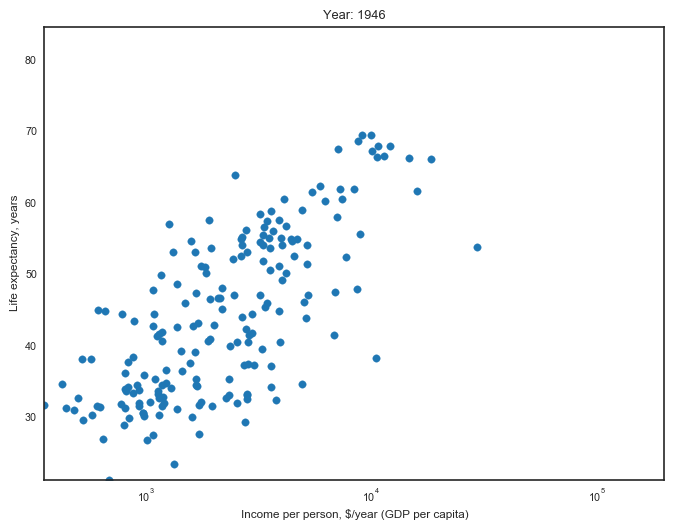

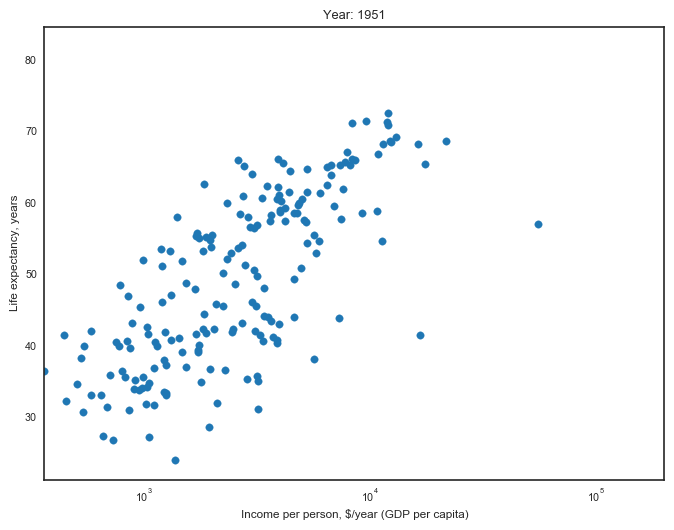

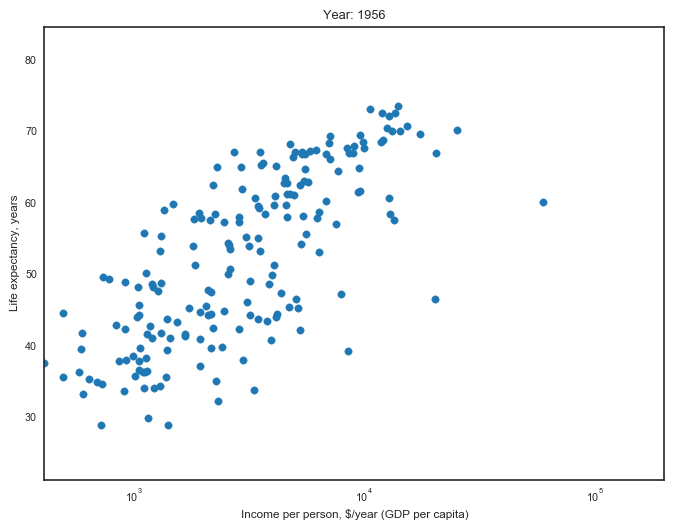

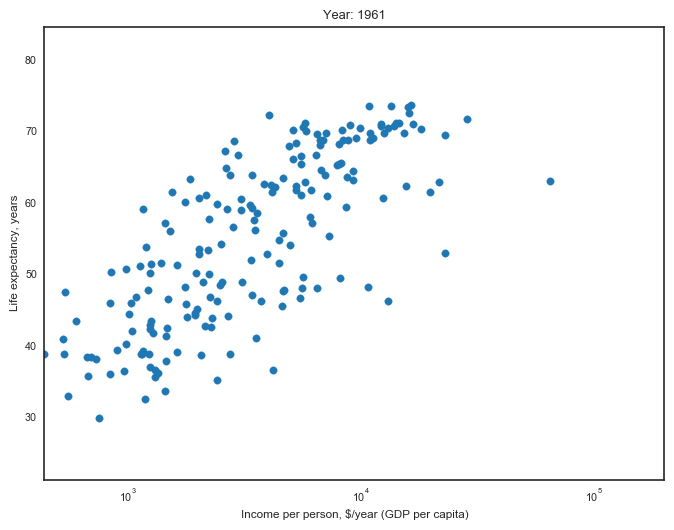

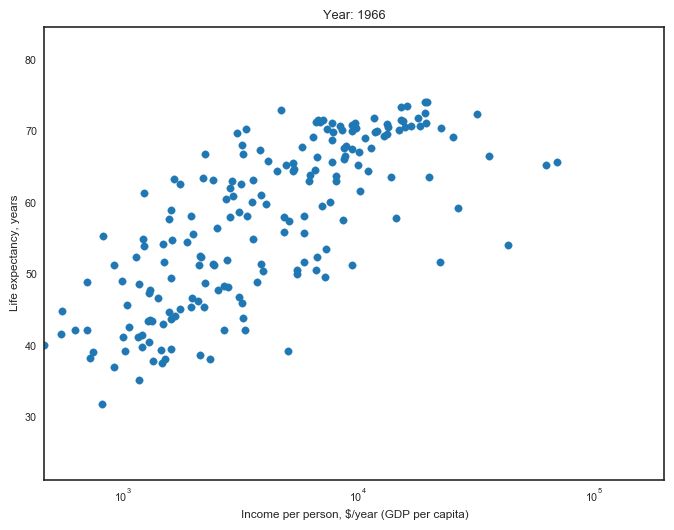

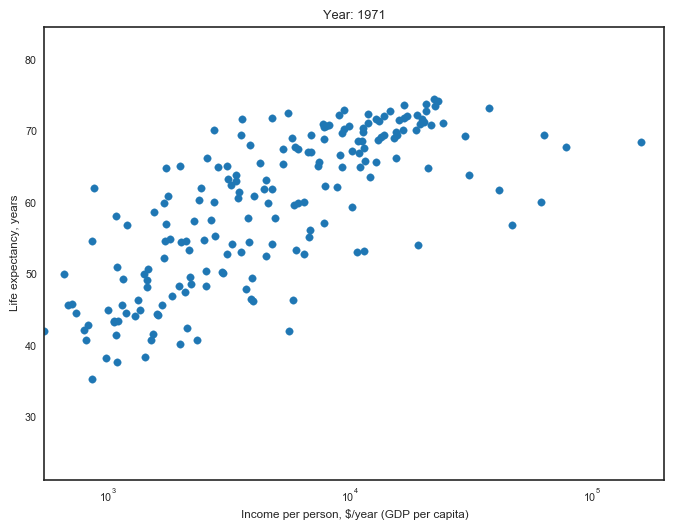

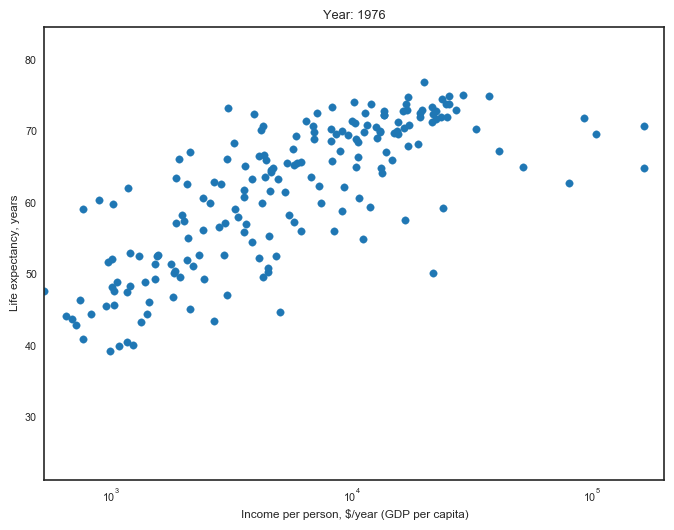

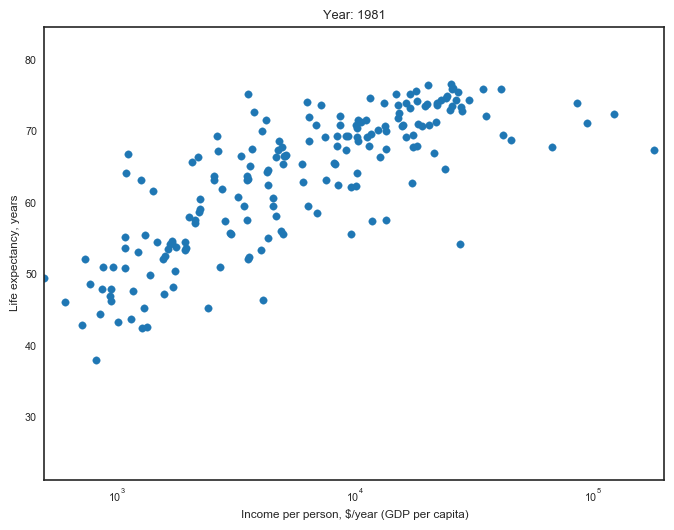

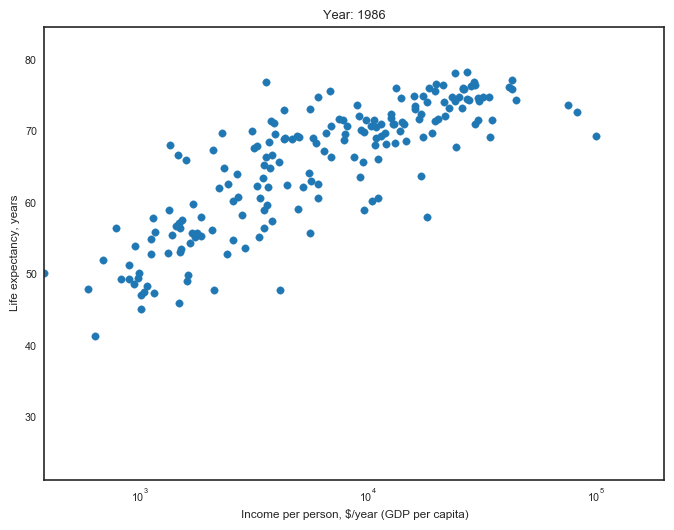

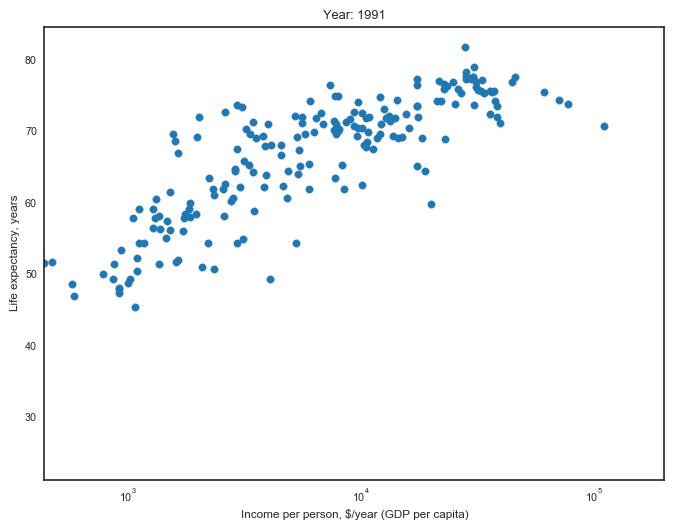

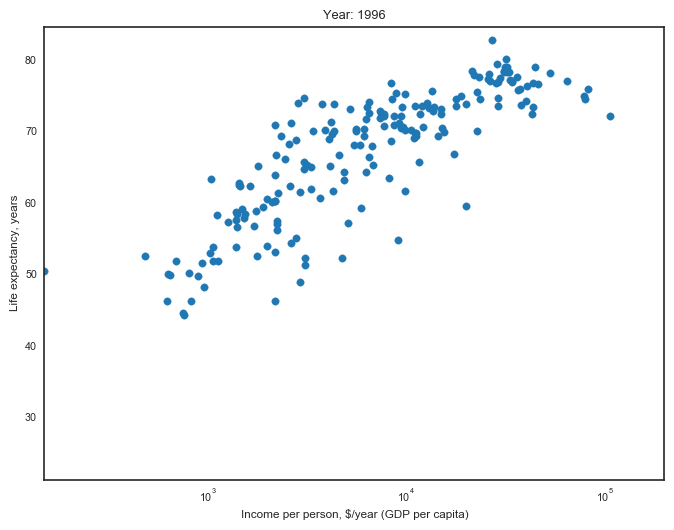

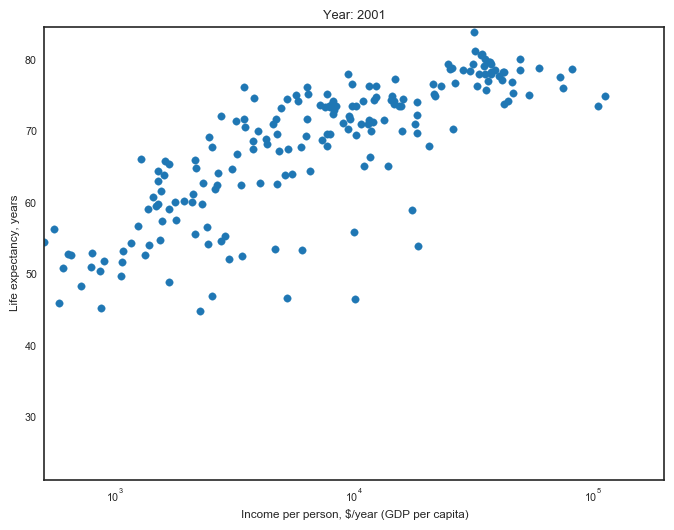

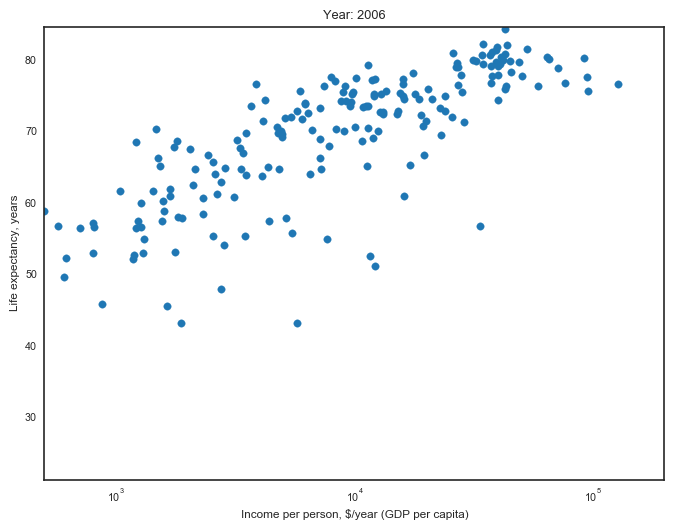

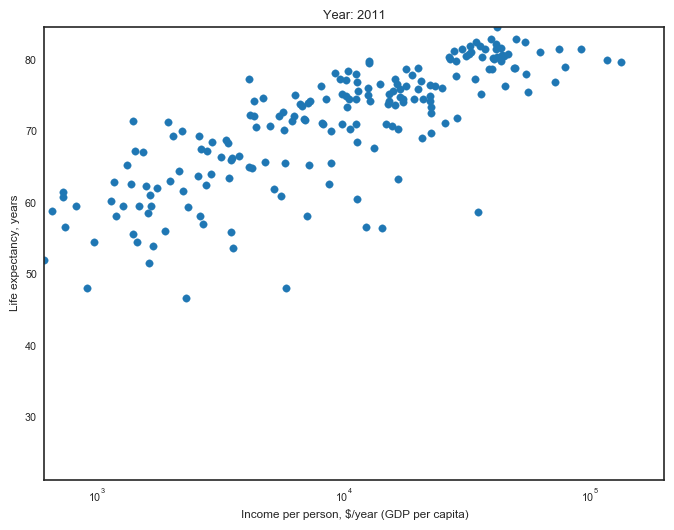

In [34]:
world_scatter_animate(df3, "life_expectancy_at_birth", 'Life expectancy, years', True, 'gap_GPD-Life.gif')

year 1996 -- there seems to be off (some negative value for Income or other), will fix later.

In [35]:
# display the animated GIF using IPython.display
Image(url='gap_GPD-Life.gif')

This is how Life expecancy evolves for all countries over the last 65 yers.
TODO: for the world_scatter_animate: add dot size, similar to [1.6].  Not implemented as the population size dataset is not part of the project sets

In [36]:
#plt.scatter(df3.loc[(df3['year'] == year), "gdp_per_capita"], 
#               df3.loc[(df3['year'] == year), "life_expectancy_at_birth"])

/Users/oggy/anaconda/lib/python3.6/site-packages/matplotlib/axes/_base.py:2966: UserWarning: Attempted to set non-positive xlimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive xlimits for log-scale axis; '


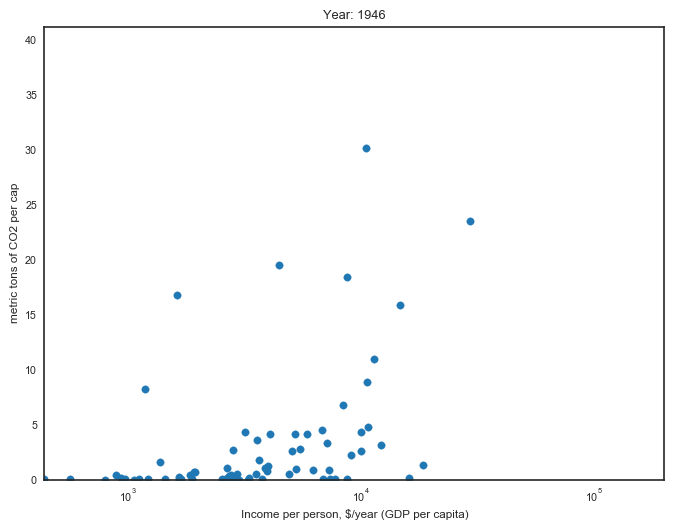

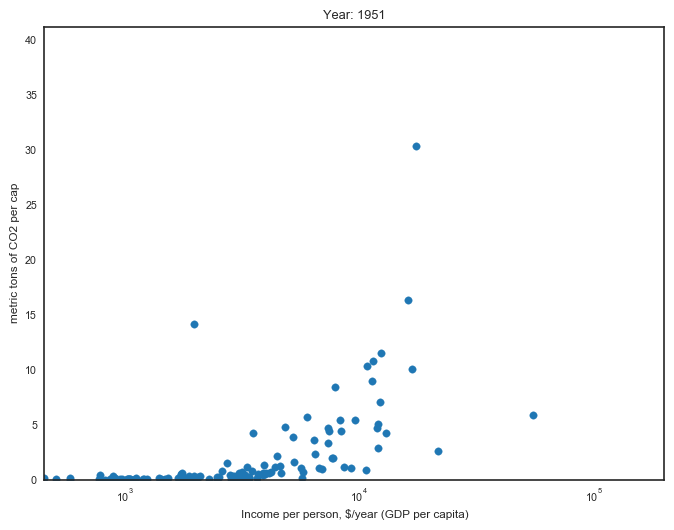

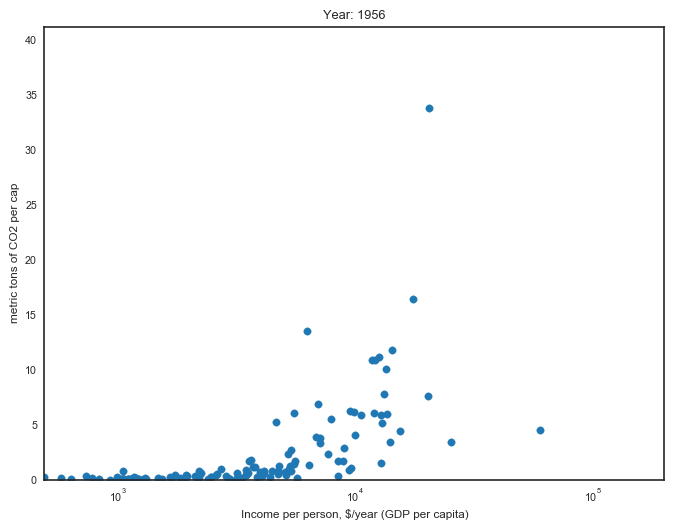

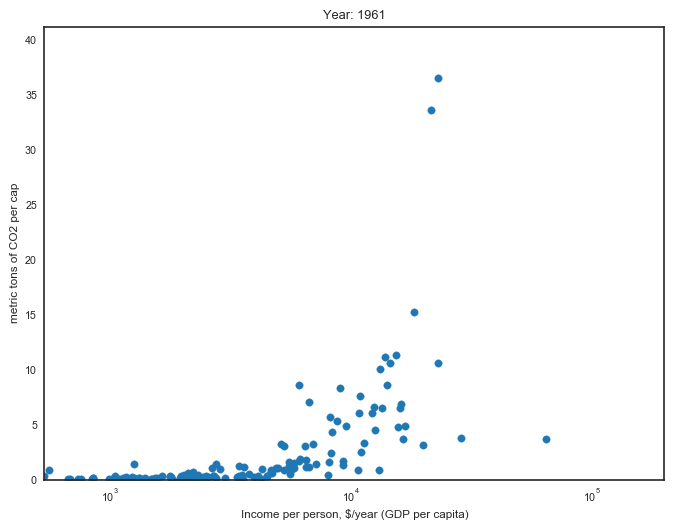

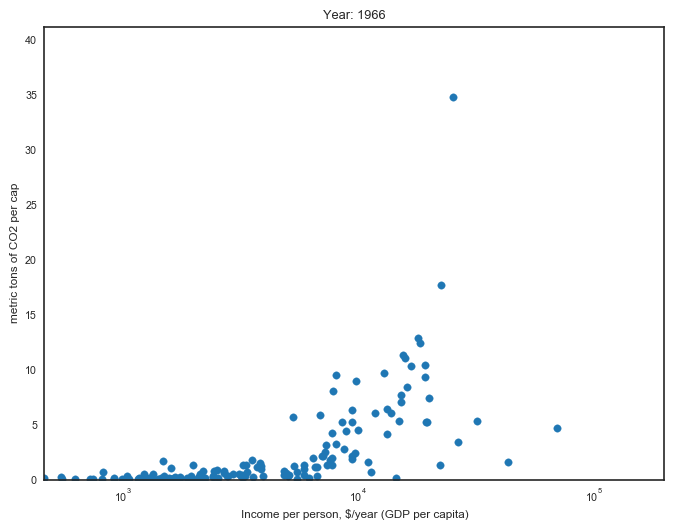

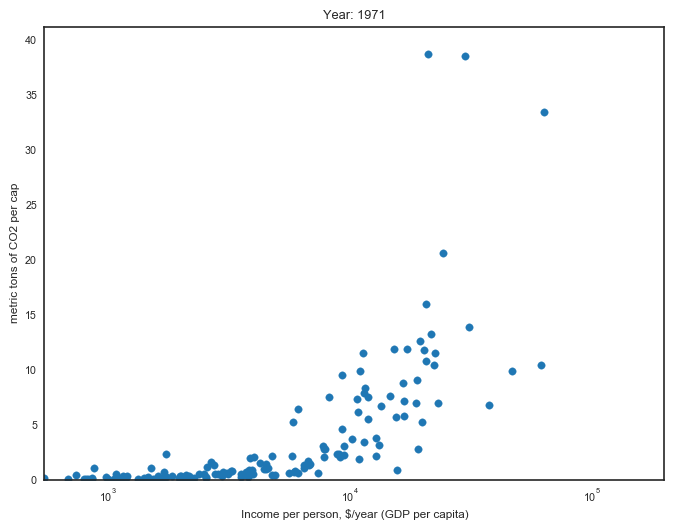

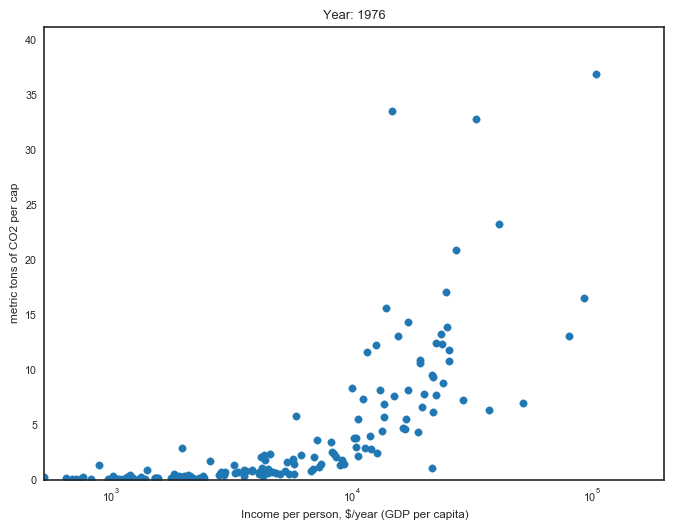

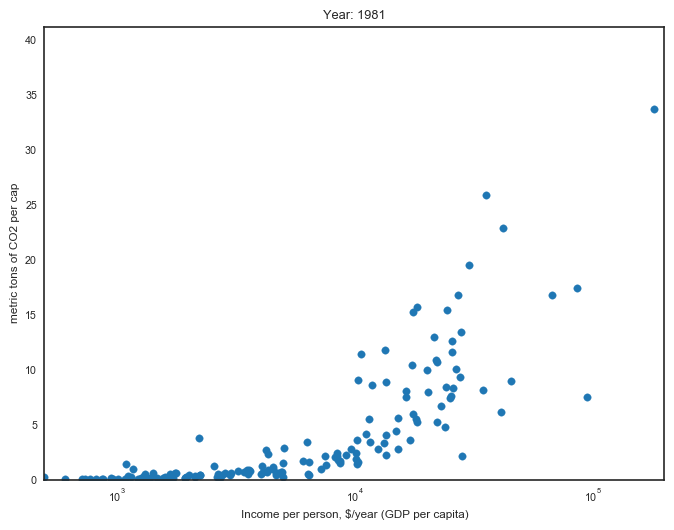

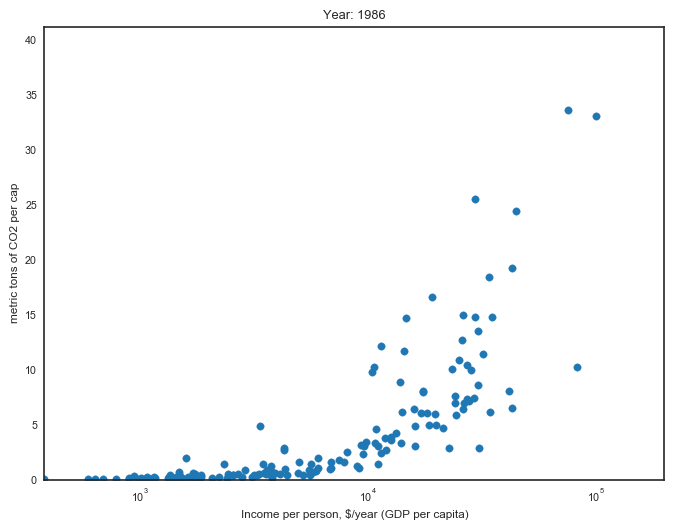

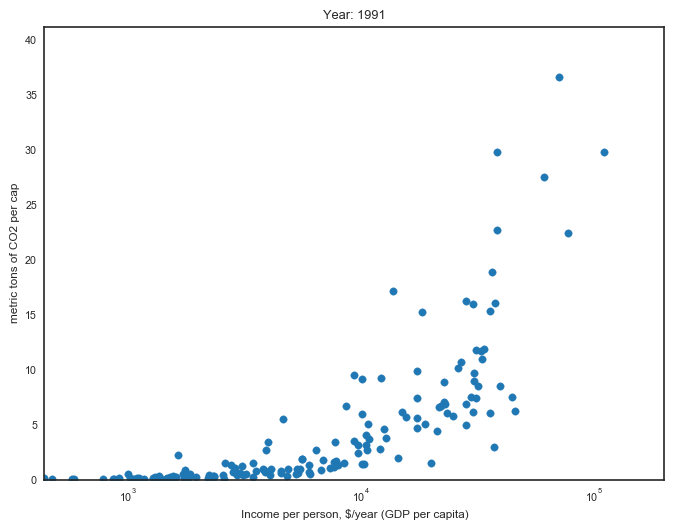

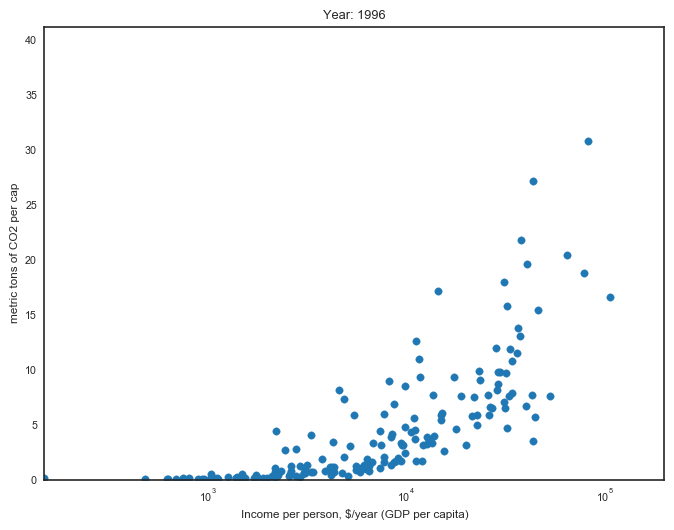

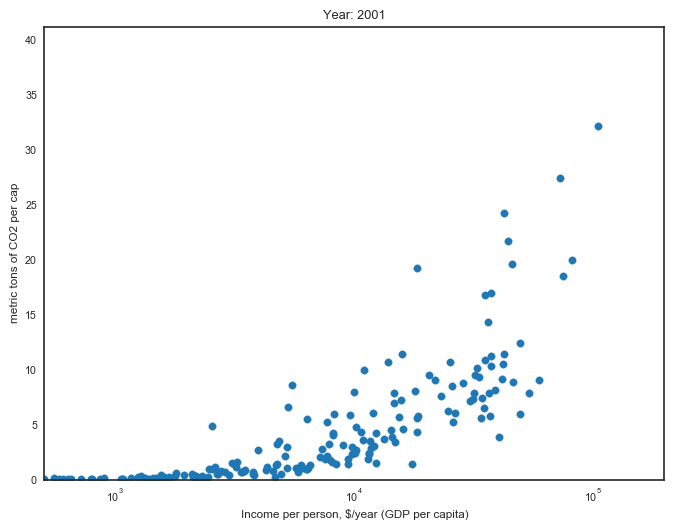

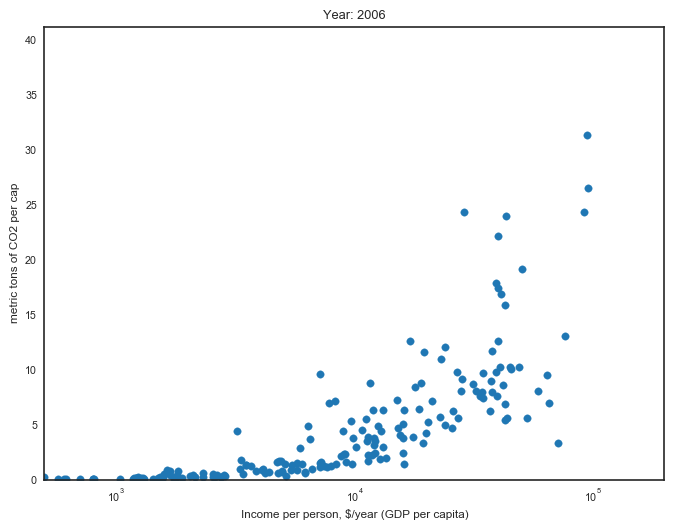

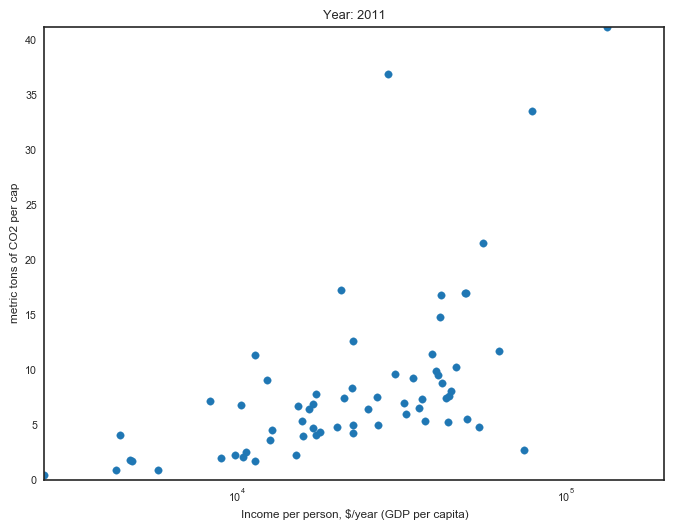

In [37]:
world_scatter_animate(df3, "carbon_dioxide_emissions_per_capita", 
                        "metric tons of CO2 per cap", True, 'gap_GPD-CO2.gif')

In [38]:
Image(url='gap_GPD-CO2.gif')

comments

In [39]:
def world_scatter(df, year, x_var, y_var, x_label, y_label, jpeg_name):
    """
    Create Matplotlib pyplot scatter for two Gapminder data variables, all countries, 
    
    saves plot as GIF
    
    """
    xllow = abs(df.loc[(df['year'] == year), x_var].min())
    xlhi = abs(df.loc[(df['year'] == year), x_var].max())
    yllow = abs(df.loc[(df['year'] == year), y_var].min())
    ylhi = abs(df.loc[(df['year'] == year), y_var].max())
    
    fig = plt.figure(figsize=(800/MY_DPI, 600/MY_DPI), dpi=MY_DPI) # at least SVGA maybe?
        
    plt.scatter(df.loc[(df['year'] == year), x_var], 
                    df.loc[(df3['year'] == year), y_var])
                #df3.loc[(df3['year'] == year), "life_expectancy_at_birth"])
        
        #if x_log: plt.xscale('log')
    
    plt.xlim(xllow, xlhi)
    plt.ylim(yllow, ylhi)
        
    plt.ylabel(y_label) 
    plt.xlabel(x_label)
    plt.title("Year: " + str(year) )
    
    #save the image 
    plt.savefig(jpeg_name, dpi=MY_DPI)
    #plt.gca()
    plt.show()

    return None
    



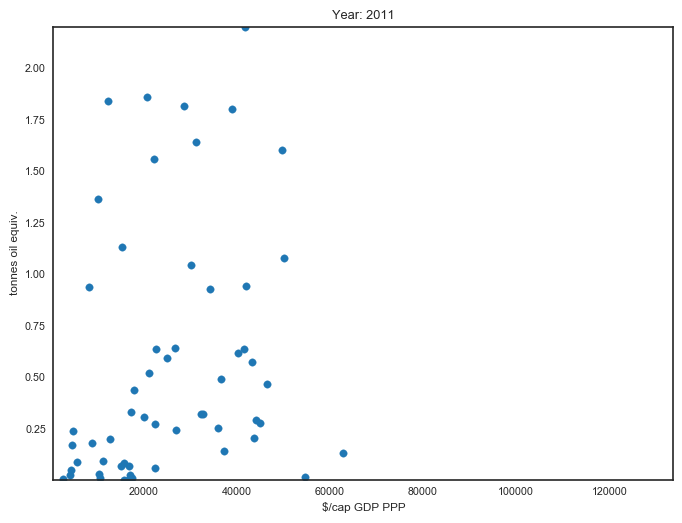

In [40]:
world_scatter(df3, 2011, "gdp_per_capita", "coal_consumption_per_capita",
              "$/cap GDP PPP", "tonnes oil equiv.", "gap2011_GDP-coal.jpeg")

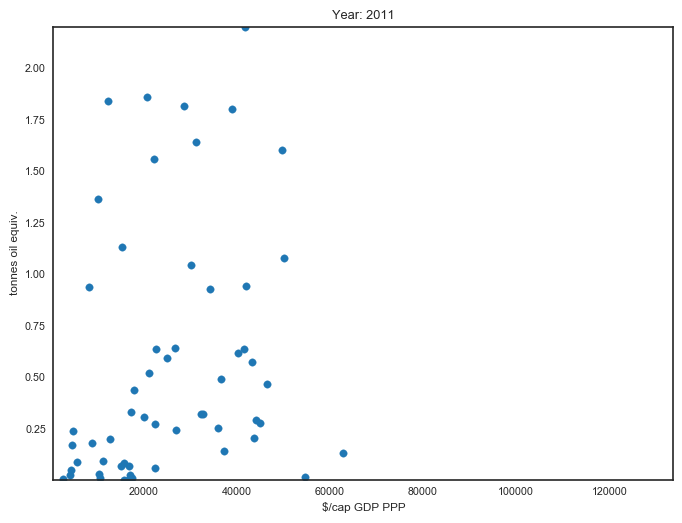

In [41]:
world_scatter(df3, 2011, "gdp_per_capita", "coal_consumption_per_capita", 
              "$/cap GDP PPP", "tonnes oil equiv.", "gap2011_GDP-coal.jpeg")

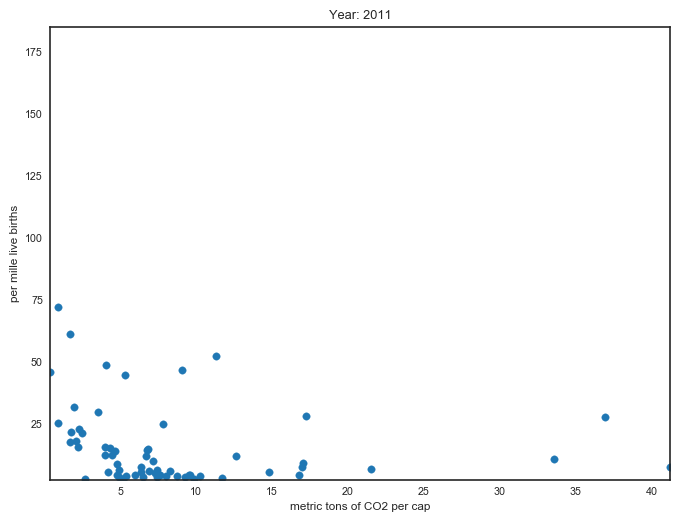

In [42]:
world_scatter(df3, 2011, "carbon_dioxide_emissions_per_capita", "under_five_mortality_rate",
              "metric tons of CO2 per cap",  "per mille live births", "gap2011-co2-u5m.jpeg")

No meaningful relation with health and life longevity here (the above figure + tables), many industrialized countries still use a lot of coal: Australia, US, but have high life expectancy at birth.  See also choropleth below.

In [43]:
#df3.loc[(df3['year'] == 2011), "life_expectancy_at_birth"]
coal_consumption_per_capita.loc[(coal_consumption_per_capita['country'] == 'Bulgaria'), 'coal_consumption_per_capita']

32       0.730855
304      0.748047
576      0.806526
848      0.870255
1120     0.869210
1392     0.944806
1664     0.926926
1936     0.949849
2208     0.951963
2480     0.931066
2752     0.971710
3024     0.902241
3296     0.895588
3568     0.952068
3840     0.978879
4112     1.023750
4384     1.036401
4656     1.085601
4928     1.078645
5200     1.078372
5472     1.124724
5744     1.156566
6016     1.157298
6288     1.081237
6560     1.108642
6832     0.992753
7104     0.863201
7376     0.874668
7648     0.951290
7920     0.888405
8192     0.905150
8464     0.921913
8736     0.944498
9008     0.903535
9280     0.791244
9552     0.800384
9824     0.893837
10096    0.828617
10368    0.920650
10640    0.916399
10912    0.882917
11184    0.891083
11456    1.003104
11728    0.989551
12000    0.843467
12272    0.909754
12544    1.133418
Name: coal_consumption_per_capita, dtype: float64

In [44]:
life_expectancy_at_birth.loc[((life_expectancy_at_birth['country'] == 'Fiji')&
                              (life_expectancy_at_birth['year'] == 1875)), 'life_expectancy_at_birth']
life_expectancy_at_birth.loc[((life_expectancy_at_birth['country'] == 'Samoa')&
                              (life_expectancy_at_birth['year'] == 1918)), 'life_expectancy_at_birth']
life_expectancy_at_birth.loc[((life_expectancy_at_birth['country'] == 'French Polynesia')&
                              (life_expectancy_at_birth['year'] == 1918)), 'life_expectancy_at_birth']
life_expectancy_at_birth.loc[((life_expectancy_at_birth['country'] == 'Tunisia')&
                              (life_expectancy_at_birth['year'] == 1820)), 'life_expectancy_at_birth'] 

5431    6.5
Name: life_expectancy_at_birth, dtype: float64

In [45]:
# found it!  it has to be 26.1 as the rest of values of that period:
life_expectancy_at_birth.loc[((life_expectancy_at_birth['country'] == 'Fiji')&
                              (life_expectancy_at_birth['year'] == 1875)), 'life_expectancy_at_birth'] = 26.1
life_expectancy_at_birth.loc[((life_expectancy_at_birth['country'] == 'Samoa')&
                              (life_expectancy_at_birth['year'] == 1918)), 'life_expectancy_at_birth'] = 25.4
life_expectancy_at_birth.loc[((life_expectancy_at_birth['country'] == 'French Polynesia')&
                              (life_expectancy_at_birth['year'] == 1918)), 'life_expectancy_at_birth'] = 25.6
life_expectancy_at_birth.loc[((life_expectancy_at_birth['country'] == 'Tunisia')&
                              (life_expectancy_at_birth['year'] == 1818)), 'life_expectancy_at_birth'] = 28.8
life_expectancy_at_birth.loc[((life_expectancy_at_birth['country'] == 'Tunisia')&
                              (life_expectancy_at_birth['year'] == 1819)), 'life_expectancy_at_birth'] = 28.8
life_expectancy_at_birth.loc[((life_expectancy_at_birth['country'] == 'Tunisia')&
                              (life_expectancy_at_birth['year'] == 1820)), 'life_expectancy_at_birth'] = 28.8
# also this block has to move up, before the merge...

In [46]:
life_expectancy_at_birth.loc[((life_expectancy_at_birth['country'] == 'Fiji')&
                              (life_expectancy_at_birth['year'] == 1875)), 'life_expectancy_at_birth']

19574    26.1
Name: life_expectancy_at_birth, dtype: float64

In [47]:
life_expectancy_at_birth.min()

country                     Afghanistan
year                               1800
life_expectancy_at_birth              4
dtype: object

Seems I can't fix all these "dents" in the Life data, and some of them are not mistakes, but some wars other sudden drops.  Better fix my Choropleth function instead -- so single year only.

In [48]:
# generate code to set 'country' as index for the individual (one df per file) variables
# keep the single var sets as they're easy to plot
print(reindex_list1) 
# re-work and this is now obsolete

agriculture_gdp_pct.set_index("country", inplace=True)
carbon_dioxide_emissions_per_capita.set_index("country", inplace=True)
coal_consumption_per_capita.set_index("country", inplace=True)
electricity_consumption_per_capita.set_index("country", inplace=True)
gdp_per_capita.set_index("country", inplace=True)
industry_gdp_pct.set_index("country", inplace=True)
life_expectancy_at_birth.set_index("country", inplace=True)
services_gdp_pct.set_index("country", inplace=True)
suicide_per_10k.set_index("country", inplace=True)
total_health_expenditure_gdp_pct.set_index("country", inplace=True)
under_five_mortality_rate.set_index("country", inplace=True)
urban_population_pct.set_index("country", inplace=True)
water_withdrawal_per_capita.set_index("country", inplace=True)



In [49]:
def countries_plot(countries_list, var_df, label):
    """
    Displays Matplotlib pyplot plot for several countries over time.
    
    Input:
    ------
    countries_list: list of country names, strings
    var_df: single variable dataframe (with country as an indes) + year (a 2nd var actually)
            as read from the original Gapminder XLSX files
            
    Returns:
    --------
    Matplotlib pyplot plot of variable over time for countries
    (None)
    
    """
    
    fig = plt.figure(figsize=(800/MY_DPI, 600/MY_DPI), dpi=MY_DPI)
    plt.title(var_df.columns[2]) # name of the variable
    plt.ylabel(label) #from labels_list?
        
    for c in countries_list:
        plt.plot(var_df.loc[(var_df['country'] == c), var_df.columns[1]],
                 var_df.loc[(var_df['country'] == c), var_df.columns[2]], label= c)  
        #plt.plot( var_df.loc[c, var_df.columns[0]], var_df.loc[c, var_df.columns[1]], label= c)
        
    plt.legend()
    plt.show()
    
    return None

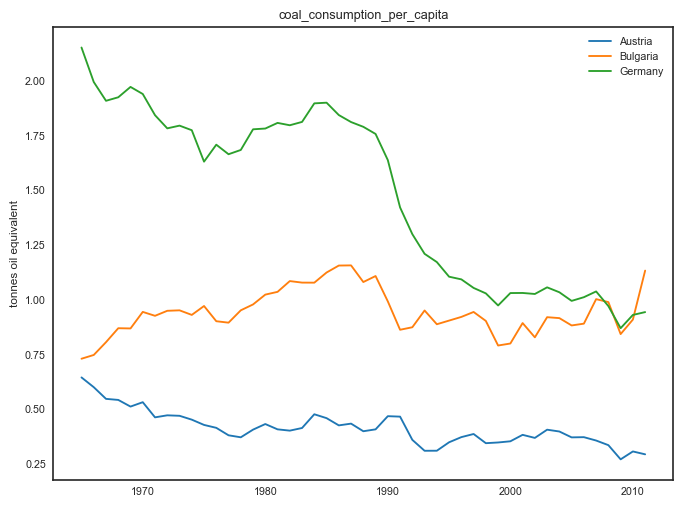

In [50]:
countries_plot(['Austria', 'Bulgaria', 'Germany'], coal_consumption_per_capita, "tonnes oil equivalent")

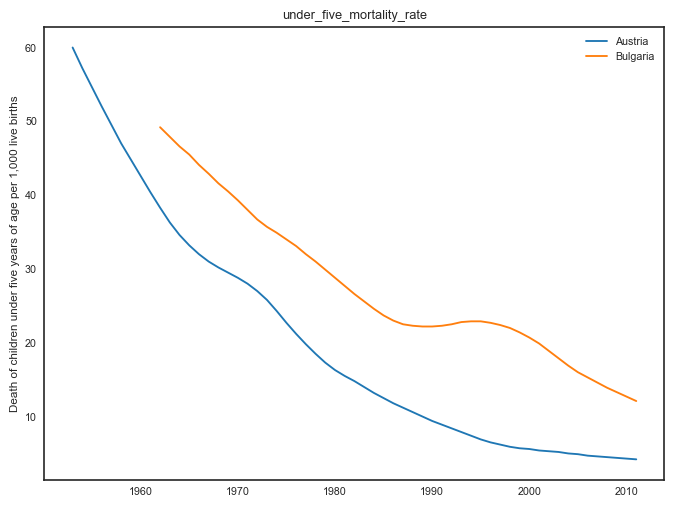

In [51]:
countries_plot(['Austria', 'Bulgaria'], under_five_mortality_rate, "Death of children under five years of age per 1,000 live births")

More data could show a plateau or even an increase in under 5 mortality, every time (early 90s, then early 2000s) Bulgaria turns back to Coal for domestic heating (due to poverty).  But this is very far fetched conclusion and needs more data: CO2 is not the only or most dangerous effect of coal etc.  More concrete relation to lung cancer etc. should be investigated from local sources like [1.9]

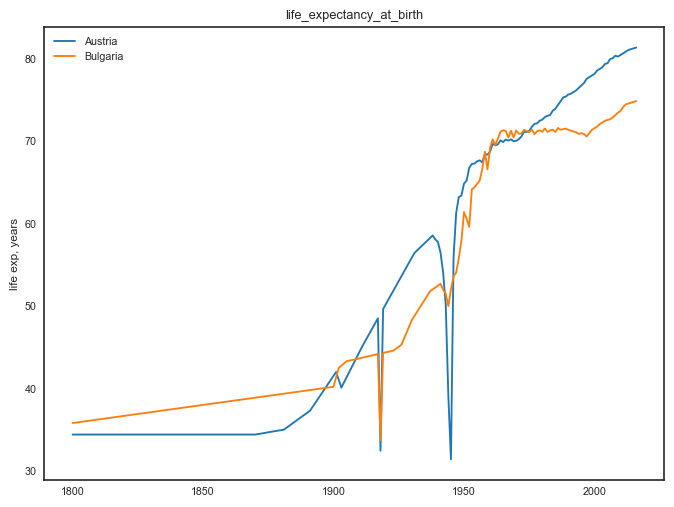

In [52]:
countries_plot(['Austria', 'Bulgaria'], life_expectancy_at_birth, "life exp, years")

The sudden drops match the timing of wars.

Austria was more involved in WWII, for WWI Austria and Bulgaria were in the same range

In [53]:
df3.describe()

life_expectancy_at_birth  agriculture_gdp_pct  industry_gdp_pct  \
count              43857.000000          6292.000000       5993.000000   
mean                  42.661683            19.302371         29.851197   
std                   16.424568            16.025910         13.100806   
min                    1.000000             0.000000          1.882058   
25%                   30.800000             5.913767         20.587509   
50%                   34.950000            15.073001         28.672634   
75%                   55.200000            30.163641         36.406916   
max                   84.800000            94.846230         95.707679   

       gdp_per_capita  services_gdp_pct  carbon_dioxide_emissions_per_capita  \
count    41124.000000       5955.000000                         14509.000000   
mean      4542.133742         50.605680                             3.564138   
std      10134.613507         14.570715                             7.094130   
min        142.000000          2.294940                             0.000000   
25%        879.000000         40.633158                             0.211067   
50%       1426.000000         50.503228                             1.043722   
75%       3426.250000         61.020560                             4.368964   
max     182668.000000         92.568209                           251.990749   

       coal_consumption_per_capita  electricity_consumption_per_capita  \
count                  2580.000000                         5281.000000   
mean                      0.539899                         3070.410799   
std                       0.683109                         4229.646571   
min                       0.000236                            6.004932   
25%                       0.042814                          388.091015   
50%                       0.264692                         1481.084887   
75%                       0.781811                         4271.334055   
max                       3.936251                        52373.877009   

       suicide_per_10k  total_health_expenditure_gdp_pct  \
count      2627.000000                       2912.000000   
mean         11.676467                          6.234390   
std           7.866677                          2.575887   
min           0.000000                          1.121474   
25%           6.057740                          4.447826   
50%          10.142510                          5.857779   
75%          15.473660                          7.664334   
max          44.352120                         22.848668   

       under_five_mortality_rate  urban_population_pct  \
count                9056.000000            193.000000   
mean                   96.358216             35.005699   
std                    90.807075             22.988539   
min                     2.500000              2.000000   
25%                    22.300000             16.400000   
50%                    63.500000             33.200000   
75%                   151.100000             47.900000   
max                   472.900000            100.000000   

       water_withdrawal_per_capita  
count                   366.000000  
mean                    580.748941  
std                     730.903856  
min                       6.724000  
25%                     135.604500  
50%                     377.426840  
75%                     749.707750  
max                    6366.485400

OK, life_expectancy_at_birth of 1 is not good -- go back and fix

In [54]:
df3.corr()

life_expectancy_at_birth  \
life_expectancy_at_birth                             1.000000   
agriculture_gdp_pct                                 -0.736947   
industry_gdp_pct                                     0.262846   
gdp_per_capita                                       0.576409   
services_gdp_pct                                     0.571164   
carbon_dioxide_emissions_per_capita                  0.370380   
coal_consumption_per_capita                          0.218762   
electricity_consumption_per_capita                   0.538275   
suicide_per_10k                                      0.055141   
total_health_expenditure_gdp_pct                     0.259403   
under_five_mortality_rate                           -0.940996   
urban_population_pct                                 0.725429   
water_withdrawal_per_capita                          0.130303   

                                     agriculture_gdp_pct  industry_gdp_pct  \
life_expectancy_at_birth                       -0.736947          0.262846   
agriculture_gdp_pct                             1.000000         -0.516760   
industry_gdp_pct                               -0.516760          1.000000   
gdp_per_capita                                 -0.570123          0.356667   
services_gdp_pct                               -0.630631         -0.319365   
carbon_dioxide_emissions_per_capita            -0.545028          0.408982   
coal_consumption_per_capita                    -0.406725          0.008089   
electricity_consumption_per_capita             -0.485719          0.053165   
suicide_per_10k                                -0.048299          0.084485   
total_health_expenditure_gdp_pct               -0.222424         -0.285851   
under_five_mortality_rate                       0.726392         -0.292365   
urban_population_pct                                 NaN          0.712219   
water_withdrawal_per_capita                    -0.038924          0.153550   

                                     gdp_per_capita  services_gdp_pct  \
life_expectancy_at_birth                   0.576409          0.571164   
agriculture_gdp_pct                       -0.570123         -0.630631   
industry_gdp_pct                           0.356667         -0.319365   
gdp_per_capita                             1.000000          0.354050   
services_gdp_pct                           0.354050          1.000000   
carbon_dioxide_emissions_per_capita        0.709982          0.249699   
coal_consumption_per_capita                0.278439          0.316200   
electricity_consumption_per_capita         0.616324          0.428258   
suicide_per_10k                            0.019431         -0.012690   
total_health_expenditure_gdp_pct           0.098239          0.460954   
under_five_mortality_rate                 -0.433485         -0.543875   
urban_population_pct                       0.547762          0.317350   
water_withdrawal_per_capita                0.027510         -0.094378   

                                     carbon_dioxide_emissions_per_capita  \
life_expectancy_at_birth                                        0.370380   
agriculture_gdp_pct                                            -0.545028   
industry_gdp_pct                                                0.408982   
gdp_per_capita                                                  0.709982   
services_gdp_pct                                                0.249699   
carbon_dioxide_emissions_per_capita                             1.000000   
coal_consumption_per_capita                                     0.761073   
electricity_consumption_per_capita                              0.528899   
suicide_per_10k                                                 0.136673   
total_health_expenditure_gdp_pct                                0.008208   
under_five_mortality_rate                                      -0.397013   
urban_population_pct                                            0.493095   
water_withdrawal_per_c

In [55]:
# write down the above table of correlations in an XLSX -- for nice print formatting
writer = pd.ExcelWriter('df3corrs.xlsx')
df3.corr().to_excel(writer,'Sheet1')
writer.save()

In [56]:
Image(url='df3corrs.png')

TODO: see how to do this with seaborn, not Excel; simarly to the seaborn heatmap from [1.6], see gallery

comments:


In [57]:
# Experiments on Choropleth visualization
#life_expectancy_at_birth2016 = df3.loc[(df3['year'] == 2016), "life_expectancy_at_birth"]
life_expectancy_at_birth2016 = life_expectancy_at_birth.loc[(life_expectancy_at_birth['year'] == 2016)]

In [58]:
life_expectancy_at_birth2016.head()

country  year  life_expectancy_at_birth
56161     Afghanistan  2016                     52.72
56163         Albania  2016                     78.10
56164         Algeria  2016                     76.50
56165  American Samoa  2016                     73.00
56166         Andorra  2016                     84.80

In [59]:
life_expectancy_at_birth.loc[(life_expectancy_at_birth['year'] == 2016), life_expectancy_at_birth.columns[2]] 
#life_expectancy_at_birth.columns[2]
#life_expectancy_at_birth[life_expectancy_at_birth.columns[2]]

56161    52.72
56163    78.10
56164    76.50
56165    73.00
56166    84.80
56167    60.00
56169    76.50
56170    76.70
56171    74.90
56172    75.85
56173    82.30
56174    81.40
56175    73.30
56176    73.90
56177    79.10
56178    70.70
56179    75.80
56180    71.30
56181    80.50
56182    71.90
56183    62.60
56184    78.60
56185    73.00
56186    73.50
56187    79.10
56188    60.13
56189    74.50
56191    77.10
56192    74.90
56193    61.20
         ...  
56379    83.10
56380    69.21
56381    79.60
56382    72.90
56383    64.91
56384    74.80
56385    72.50
56386    61.90
56388    71.70
56390    72.50
56391    77.60
56392    79.30
56393    70.40
56396    61.91
56397    71.70
56398    75.40
56399    81.10
56400    79.10
56401    77.00
56403    72.10
56405    65.10
56406    74.80
56407    74.70
56409    68.56
56410    75.60
56411    80.82
56414    64.92
56416    57.10
56417    61.69
56419    56.10
Name: life_expectancy_at_birth, Length: 208, dtype: float64

some ideas from [1.7] will help diplay and save a Choropleth.  
Folium seems easy to implement for the case.  
Countries boundaries data in geoJSON is used from [1.8].


In [60]:
map=folium.Map(location=[0, 0], zoom_start=2, tiles='Mapbox bright')

geo_path = 'countries.geo.json'

geo_str = json.dumps(json.load(open(geo_path, 'r')))


#map.add_child(folium.GeoJson(geo_str)) #, style_function=lambda x: {'fillColor':'green' if x['properties']['pop_est'] <= 10000000 
#                                       else 'orange' if 10000000 < x['properties']['pop_est'] < 20000000 
#                                       else 'red'}, name = "population"))


map.choropleth(geo_str, data = life_expectancy_at_birth2016,
               key_on="properties.name",
               columns = ['country', 'life_expectancy_at_birth'],
               fill_color='YlGn', #fill_opacity=0.5, line_opacity=0.5,
               threshold_scale = [50,55, 60, 65,70, 75],
               name= 'life') #.add_to(map)

#folium.GeoJson(geo_str).add_to(map)

map.add_child(folium.LayerControl())

map.save(outfile='map.html')


In [61]:
map

Some names need a sync between the Gapminder dataframe and the geoJSON (or their Life expectancy is pretty short :):
United States, Serbia, FYROM, Slovakia, Congo, DRC, Cote d'Ivoire, Kyrgyzstan, Kosovo, Laos (in the XLSX) and why two Somalias.

New geoJSON file created with the names in sync: countries1

Also a different threshold_scale is needed.

In [62]:
map1=folium.Map(location=[0, 0], zoom_start=2, tiles='Mapbox bright')

geo_path = 'countries1.geo.json'

geo_str = json.dumps(json.load(open(geo_path, 'r')))

map1.choropleth(geo_str, data = life_expectancy_at_birth2016,
               key_on="properties.name",
               columns = ['country', 'life_expectancy_at_birth'],
               fill_color='YlGn', #fill_opacity=0.5, line_opacity=0.5,
               threshold_scale = [55, 60, 65, 70, 75, 80],
               name= 'life1') #.add_to(map)

#folium.GeoJson(geo_str).add_to(map) #fill_color='BuPu'

map1.add_child(folium.LayerControl())

map1.save(outfile='map.html')


In [63]:
map1

much better.  Afghanistan still looks pretty pale, but this is due to the was.

now wrap this in a function

In [64]:
def world_choro(year, var_df, fname, colors):
    """
    generates a choropleth of one variable as a layer over Folium world map;
    displays and saves it as an HTML
    
    Parameters:
    -----------
    year: for a given year, 
    var_df: dataframe as read from the Gapminder files
    colors: 'YlGn' or 'YlOrRd' or 'BuPu' or similar pair/triplet
    fname: file name, incl. the '.html' extension
    
    Returns:
    --------
    displays map;  saves map html file with fname
    
    """
    data = var_df.loc[(var_df['year'] == year)]
    
    threshold_scale = np.linspace(data[data.columns[2]].min(),
                                  data[data.columns[2]].max(), 6, dtype=int).tolist()
    print(threshold_scale)
    
    map = folium.Map(location=[0, 0], zoom_start=2, tiles='Mapbox bright')

    geo_path = 'countries1.geo.json'

    geo_str = json.dumps(json.load(open(geo_path, 'r')))

    map.choropleth(geo_str, data = data,
                   key_on="properties.name",
                   columns = ['country', var_df.columns[2]],
                   fill_color= colors, 
                   #fill_opacity=0.5, line_opacity=0.5,
                   
                   threshold_scale = threshold_scale,
                   name= fname) #.add_to(map)

    #folium.GeoJson(geo_str).add_to(map) #fill_color='BuPu'

    map.add_child(folium.LayerControl())

    map.save(outfile= fname)
    
    display(map)
    return None

In [65]:
world_choro(2016, life_expectancy_at_birth, 'life_exp.html', 'BuPu')

[48, 56, 63, 70, 77, 84]


In [66]:
world_choro(2011, coal_consumption_per_capita, 'coal_perc.html', 'YlOrRd')

[0, 0, 0, 1, 1, 2]


In [67]:
world_choro(2010, total_health_expenditure_gdp_pct, 'totalhe_pgdp.html', 'YlGn')

[1, 5, 8, 11, 14, 18]


In [68]:
world_choro(2011, under_five_mortality_rate, 'under5mort.html', 'BuPu')

[1, 38, 75, 111, 148, 185]


It is tempting to say there is a climatic relation, but there isn't: equatorial countries in Asia an the Caribbean are in a very good shape.  Especially Costa Rica.

Resulting HTML files are easy to print or convert to PDF -- they're all in the main directory of the project.

## 2. Gapminder data, part 2: Food and drink 
**How do our choices in food and drinks affect our overall health?**

Let's reuse the import code, store both a big dataframe with all variables + individual with only one (+year, melted)

In [69]:
# generate code to read from the 2nd set of files
# filenames in col_list2 will be used as dataframe names

labels_list2 = []
reindex_list2 = ""
load_list2_files = ""
for i in range(0, len(col_list2)):
    t= col_list2[i] + '.columns[0]'
    load_list2_files += col_list2[i] + ' = pd.read_excel(\'' + data_files_list2[i] 
    load_list2_files += '\', sheetname=0, header=0)\n' + 'labels_list2.append(' +  t + ')\n' 
    load_list2_files += col_list2[i] + ' = ' + col_list2[i] + '.rename( columns={' + t + ': \'country\'})\n' 
    load_list2_files += col_list2[i] + ' = pd.melt(' + col_list2[i] 
    load_list2_files += ', id_vars=[\'country\'], var_name= \'year\',  value_name=\'' + col_list2[i] + '\')\n' 
    load_list2_files += col_list2[i] + ' = ' + col_list2[i] + '.dropna()\n\n'

    reindex_list2 = reindex_list2 + col_list2[i] + '.set_index("country", inplace=True)\n'   
    
    
    #print(col_list2[i], ' = pd.read_excel(\'' + data_files_list2[i] + '\', sheetname=0, header=0)' )

    #t= col_list2[i] + '.columns[0]'
    #print('labels_list2.append(' +  t + ')')
    #print(col_list2[i] + ' = ' + col_list2[i] + '.rename( columns={' + t + ': \'country\'})')
    
    #print(col_list2[i] + ' = pd.melt(' + col_list2[i] + 
    #      ', id_vars=[\'country\'], var_name= \'year\',  value_name=\'' + col_list2[i] + '\')')
    
    #reindex_list2 = reindex_list2 + col_list2[i] + '.set_index("country", inplace=True)\n' 
    ##print(col_list2[i] + '.set_index(["country", "year"], inplace=True)')  #["country", "year"]
    
    #print(col_list2[i] + ' = ' + col_list2[i] + '.dropna()')
    
    #print('')


#manual execute version, now obsolete  
alcohol_consumption  = pd.read_excel('2. FoodAndDrink/alcohol_consumption.xlsx', sheetname=0, header=0)
labels_list2.append(alcohol_consumption.columns[0])
alcohol_consumption = alcohol_consumption.rename( columns={alcohol_consumption.columns[0]: 'country'})
alcohol_consumption = pd.melt(alcohol_consumption, id_vars=['country'], var_name= 'year',  value_name='alcohol_consumption')
alcohol_consumption = alcohol_consumption.dropna()

blood_pressure_female  = pd.read_excel('2. FoodAndDrink/blood_pressure_female.xlsx', sheetname=0, header=0)
labels_list2.append(blood_pressure_female.columns[0])
blood_pressure_female = blood_pressure_female.rename( columns={blood_pressure_female.columns[0]: 'country'})
blood_pressure_female = pd.melt(blood_pressure_female, id_vars=['country'], var_name= 'year',  value_name='blood_pressure_female')
blood_pressure_female = blood_pressure_female.dropna()

blood_pressure_male  = pd.read_excel('2. FoodAndDrink/blood_pressure_male.xlsx', sheetname=0, header=0)
labels_list2.append(blood_pressure_male.columns[0])
blood_pressure_male = blood_pressure_male.rename( columns={blood_pressure_male.columns[0]: 'country'})
blood_pressure_male = pd.melt(blood_pressure_male, id_vars=['country'], var_name= 'year',  value_name='blood_pressure_male')
blood_pressure_male = blood_pressure_male.dropna()

bmi_female  = pd.read_excel('2. FoodAndDrink/bmi_female.xlsx', sheetname=0, header=0)
labels_list2.append(bmi_female.columns[0])
bmi_female = bmi_female.rename( columns={bmi_female.columns[0]: 'country'})
bmi_female = pd.melt(bmi_female, id_vars=['country'], var_name= 'year',  value_name='bmi_female')
bmi_female = bmi_female.dropna()

bmi_male  = pd.read_excel('2. FoodAndDrink/bmi_male.xlsx', sheetname=0, header=0)
labels_list2.append(bmi_male.columns[0])
bmi_male = bmi_male.rename( columns={bmi_male.columns[0]: 'country'})
bmi_male = pd.melt(bmi_male, id_vars=['country'], var_name= 'year',  value_name='bmi_male')
bmi_male = bmi_male.dropna()

cholesterol_female  = pd.read_excel('2. FoodAndDrink/cholesterol_female.xlsx', sheetname=0, header=0)
labels_list2.append(cholesterol_female.columns[0])
cholesterol_female = cholesterol_female.rename( columns={cholesterol_female.columns[0]: 'country'})
cholesterol_female = pd.melt(cholesterol_female, id_vars=['country'], var_name= 'year',  value_name='cholesterol_female')
cholesterol_female = cholesterol_female.dropna()

cholesterol_male  = pd.read_excel('2. FoodAndDrink/cholesterol_male.xlsx', sheetname=0, header=0)
labels_list2.append(cholesterol_male.columns[0])
cholesterol_male = cholesterol_male.rename( columns={cholesterol_male.columns[0]: 'country'})
cholesterol_male = pd.melt(cholesterol_male, id_vars=['country'], var_name= 'year',  value_name='cholesterol_male')
cholesterol_male = cholesterol_male.dropna()

food_consumption  = pd.read_excel('2. FoodAndDrink/food_consumption.xlsx', sheetname=0, header=0)
labels_list2.append(food_consumption.columns[0])
food_consumption = food_consumption.rename( columns={food_consumption.columns[0]: 'country'})
food_consumption = pd.melt(food_consumption, id_vars=['country'], var_name= 'year',  value_name='food_consumption')
food_consumption = food_consumption.dropna()

sugar_consumption  = pd.read_excel('2. FoodAndDrink/sugar_consumption.xlsx', sheetname=0, header=0)
labels_list2.append(sugar_consumption.columns[0])
sugar_consumption = sugar_consumption.rename( columns={sugar_consumption.columns[0]: 'country'})
sugar_consumption = pd.melt(sugar_consumption, id_vars=['country'], var_name= 'year',  value_name='sugar_consumption')
sugar_consumption = sugar_consumption.dropna()

When doing import with pandas read_xls 3 files with blank A1 cell (alcohol, food and sugar) were bahaving erratically (country column interpreted as float).
Filled in A1 for these 3 with the respective unit of measurement, same as the rest of the set.

In [70]:
#execute the code to load and clean up Set No.2
#
exec(load_list2_files)

In [71]:
sugar_consumption

country  year  sugar_consumption
3                   Albania  1961              30.14
4                   Algeria  1961              46.58
7                    Angola  1961              24.66
9       Antigua and Barbuda  1961              95.89
10                Argentina  1961             106.85
13                Australia  1961             153.43
14                  Austria  1961             109.59
16                  Bahamas  1961              93.15
18               Bangladesh  1961              24.66
19                 Barbados  1961             142.47
21                  Belgium  1961              73.97
22                   Belize  1961              71.23
23                    Benin  1961               5.48
24                  Bermuda  1961             115.07
26                  Bolivia  1961              52.06
28                 Botswana  1961              46.58
29                   Brazil  1961             112.33
31                   Brunei  1961              93.15
32                 Bulgaria  1961              54.80
33             Burkina Faso  1961               2.74
34                  Burundi  1961               0.00
35                 Cambodia  1961              27.40
36                 Cameroon  1961               2.74
37                   Canada  1961             123.29
38               Cape Verde  1961              41.10
40     Central African Rep.  1961               5.48
41                     Chad  1961              13.70
43                    Chile  1961              73.97
44                    China  1961               5.48
47                 Colombia  1961             147.95
...                     ...   ...                ...
11350             Sri Lanka  2004              84.93
11351                 Sudan  2004              57.53
11352              Suriname  2004             150.69
11354             Swaziland  2004             136.99
11355                Sweden  2004             128.77
11356           Switzerland  2004             164.38
11357                 Syria  2004             117.81
11359            Tajikistan  2004              41.10
11360              Tanzania  2004              19.18
11361              Thailand  2004              87.67
11362           Timor-Leste  2004              16.44
11363                  Togo  2004              16.44
11367   Trinidad and Tobago  2004             156.16
11368               Tunisia  2004              95.89
11369                Turkey  2004              65.75
11370          Turkmenistan  2004              27.40
11373                Uganda  2004              24.66
11374               Ukraine  2004             120.55
11375  United Arab Emirates  2004             104.11
11376        United Kingdom  2004             112.33
11377         United States  2004             191.78
11378               Uruguay  2004             104.11
11380            Uzbekistan  2004              10.96
11382               Vanuatu  2004              38.36
11383             Venezuela  2004              98.63
11384    West Bank and Gaza  2004              90.41
11387               Vietnam  2004              35.62
11391           Yemen, Rep.  2004              65.75
11393                Zambia  2004              46.58
11394              Zimbabwe  2004             104.11

[7075 rows x 3 columns]

In [72]:
# fix the year column to numeric
sugar_consumption[['year']] = sugar_consumption[['year']].apply(pd.to_numeric)
food_consumption[['year']] = food_consumption[['year']].apply(pd.to_numeric)
cholesterol_female[['year']] = cholesterol_female[['year']].apply(pd.to_numeric)
cholesterol_male[['year']] = cholesterol_male[['year']].apply(pd.to_numeric)
bmi_female[['year']] = bmi_female[['year']].apply(pd.to_numeric)
bmi_male[['year']] = bmi_male[['year']].apply(pd.to_numeric)
blood_pressure_female[['year']] = blood_pressure_female[['year']].apply(pd.to_numeric)
blood_pressure_male[['year']] = blood_pressure_male[['year']].apply(pd.to_numeric)
alcohol_consumption[['year']] = alcohol_consumption[['year']].apply(pd.to_numeric)


In [73]:
life_expectancy_at_birth[['year']] = life_expectancy_at_birth[['year']].apply(pd.to_numeric)

In [74]:
alcohol_consumption

country  year  alcohol_consumption
138                 Russia  1985                13.31
327                 Russia  1986                10.77
516                 Russia  1987                10.96
705                 Russia  1988                11.57
894                 Russia  1989                12.04
979                  Chile  1990                 9.43
996                Ecuador  1990                 8.40
1011                Greece  1990                12.51
1083                Russia  1990                12.29
1272                Russia  1991                12.67
1422     Macedonia [FYROM]  1992                12.66
1461                Russia  1992                13.23
1621               Moldova  1993                18.10
1650                Russia  1993                13.60
1664              Slovenia  1993                24.19
1689               Ukraine  1993                13.00
1710               Austria  1994                12.62
1748               Denmark  1994                14.36
1760               Finland  1994                 9.79
1776               Iceland  1994                 5.52
1825                Norway  1994                 6.26
1839                Russia  1994                13.30
1946               Estonia  1995                10.74
1964               Hungary  1995                14.52
2008           New Zealand  1995                 9.19
2045          South Africa  1995                10.00
2102                Brazil  1996                14.01
2241                Sweden  1996                 8.00
2619                Sweden  1998                 8.20
2997                Sweden  2000                 8.40
...                    ...   ...                  ...
4506                 Sudan  2008                 2.56
4507              Suriname  2008                 6.56
4508             Swaziland  2008                 5.05
4509                Sweden  2008                 9.50
4510           Switzerland  2008                11.41
4511                 Syria  2008                 1.49
4512            Tajikistan  2008                 3.39
4513              Tanzania  2008                 7.86
4514              Thailand  2008                 7.08
4515           Timor-Leste  2008                 0.74
4516                  Togo  2008                 1.92
4517                 Tonga  2008                 3.92
4518   Trinidad and Tobago  2008                 6.16
4519               Tunisia  2008                 1.05
4520                Turkey  2008                 3.02
4521          Turkmenistan  2008                 5.00
4522                Tuvalu  2008                 2.14
4523                Uganda  2008                16.40
4524               Ukraine  2008                17.47
4525  United Arab Emirates  2008                 0.52
4526        United Kingdom  2008                13.24
4527         United States  2008                 9.70
4528               Uruguay  2008                 8.99
4529            Uzbekistan  2008                 3.61
4530               Vanuatu  2008                 0.96
4531             Venezuela  2008                 7.60
4532               Vietnam  2008                 3.91
4533                 Yemen  2008                 0.20
4534                Zambia  2008                 3.56
4535              Zimbabwe  2008                 4.96

[411 rows x 3 columns]

In [75]:
# merge all of the data from set 2. Food and drink, into one dataframe named df4
# looking at the data set files, I assume life_expectancy_at_birth is the biggest set, with 216 or so years
# start with it and LEFT merge
df_temp1 = pd.merge(life_expectancy_at_birth, alcohol_consumption, left_on=['country', 'year'], right_on=['country', 'year'], how='left')

In [76]:
df_temp2 = pd.merge(df_temp1, blood_pressure_female, left_on=['country', 'year'], right_on=['country', 'year'], how='left')

df_temp1 = pd.merge(df_temp2, blood_pressure_male, left_on=['country', 'year'], right_on=['country', 'year'], how='left')
df_temp2 = pd.merge(df_temp1, bmi_female, left_on=['country', 'year'], right_on=['country', 'year'], how='left')

df_temp1 = pd.merge(df_temp2, bmi_male, left_on=['country', 'year'], right_on=['country', 'year'], how='left')
df_temp2 = pd.merge(df_temp1, cholesterol_female, left_on=['country', 'year'], right_on=['country', 'year'], how='left')

df_temp1 = pd.merge(df_temp2, cholesterol_male, left_on=['country', 'year'], right_on=['country', 'year'], how='left')
df_temp2 = pd.merge(df_temp1, food_consumption, left_on=['country', 'year'], right_on=['country', 'year'], how='left')

df4 = pd.merge(df_temp2, sugar_consumption, left_on=['country', 'year'], right_on=['country', 'year'], how='left')


In [77]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43857 entries, 0 to 43856
Data columns (total 12 columns):
country                     43857 non-null object
year                        43857 non-null int64
life_expectancy_at_birth    43857 non-null float64
alcohol_consumption         374 non-null float64
blood_pressure_female       5296 non-null float64
blood_pressure_male         5296 non-null float64
bmi_female                  5296 non-null float64
bmi_male                    5296 non-null float64
cholesterol_female          5296 non-null float64
cholesterol_male            5296 non-null float64
food_consumption            6958 non-null float64
sugar_consumption           6457 non-null float64
dtypes: float64(10), int64(1), object(1)
memory usage: 4.3+ MB


In [78]:
df4.head()

country  year  life_expectancy_at_birth  alcohol_consumption  \
0          Afghanistan  1800                     28.21                  NaN   
1              Albania  1800                     35.40                  NaN   
2              Algeria  1800                     28.82                  NaN   
3               Angola  1800                     26.98                  NaN   
4  Antigua and Barbuda  1800                     33.54                  NaN   

   blood_pressure_female  blood_pressure_male  bmi_female  bmi_male  \
0                    NaN                  NaN         NaN       NaN   
1                    NaN                  NaN         NaN       NaN   
2                    NaN                  NaN         NaN       NaN   
3                    NaN                  NaN         NaN       NaN   
4                    NaN                  NaN         NaN       NaN   

   cholesterol_female  cholesterol_male  food_consumption  sugar_consumption  
0                 NaN               NaN               NaN                NaN  
1                 NaN               NaN               NaN                NaN  
2                 NaN               NaN               NaN                NaN  
3                 NaN               NaN               NaN                NaN  
4                 NaN               NaN               NaN                NaN

In [79]:
#print(reindex_list2) 
# execute the above code to re-index.  later on use the individual dataframes for plots

Alcohol consumption dataframe seems very sparse

In [80]:
df4.describe()

year  life_expectancy_at_birth  alcohol_consumption  \
count  43857.000000              43857.000000           374.000000   
mean    1908.489044                 42.665035             7.063743   
std       62.827678                 16.418909             4.964429   
min     1800.000000                  4.000000             0.020000   
25%     1854.000000                 30.800000             2.787500   
50%     1909.000000                 34.950000             6.545000   
75%     1963.000000                 55.200000            10.395000   
max     2016.000000                 84.800000            24.190000   

       blood_pressure_female  blood_pressure_male   bmi_female     bmi_male  \
count            5296.000000          5296.000000  5296.000000  5296.000000   
mean              127.426056           130.877746    24.580195    23.931114   
std                 4.323692             4.064383     2.533715     2.225390   
min               110.335300           118.522100    18.471660    19.013940   
25%               124.371975           128.028025    22.665737    21.792535   
50%               127.681700           131.040600    24.942905    24.428825   
75%               130.559050           133.719900    26.195067    25.643142   
max               139.455900           143.123700    34.259690    30.995630   

       cholesterol_female  cholesterol_male  food_consumption  \
count         5296.000000       5296.000000       6958.000000   
mean             4.911973          4.793457       2530.026870   
std              0.437910          0.519378        522.950607   
min              3.974110          3.728100       1417.730000   
25%              4.567309          4.400334       2120.145000   
50%              4.878458          4.771197       2450.725000   
75%              5.234469          5.163511       2960.912500   
max              6.200450          6.243433       3818.800000   

       sugar_consumption  
count        6457.000000  
mean           74.561529  
std            44.916827  
min             0.000000  
25%            32.880000  
50%            79.450000  
75%           109.590000  
max           194.520000

In [81]:
df4.corr()

year  life_expectancy_at_birth  \
year                      1.000000                  0.776418   
life_expectancy_at_birth  0.776418                  1.000000   
alcohol_consumption      -0.255327                  0.281700   
blood_pressure_female    -0.151417                 -0.045885   
blood_pressure_male      -0.128343                  0.153967   
bmi_female                0.273998                  0.587546   
bmi_male                  0.251854                  0.729490   
cholesterol_female       -0.204051                  0.703067   
cholesterol_male         -0.161024                  0.727364   
food_consumption          0.252915                  0.732264   
sugar_consumption         0.112125                  0.725135   

                          alcohol_consumption  blood_pressure_female  \
year                                -0.255327              -0.151417   
life_expectancy_at_birth             0.281700              -0.045885   
alcohol_consumption                  1.000000               0.099956   
blood_pressure_female                0.099956               1.000000   
blood_pressure_male                  0.466927               0.838367   
bmi_female                           0.113357               0.098592   
bmi_male                             0.328227               0.040663   
cholesterol_female                   0.474447               0.232062   
cholesterol_male                     0.477887               0.158741   
food_consumption                     0.452096               0.123138   
sugar_consumption                   -0.454074              -0.012134   

                          blood_pressure_male  bmi_female  bmi_male  \
year                                -0.128343    0.273998  0.251854   
life_expectancy_at_birth             0.153967    0.587546  0.729490   
alcohol_consumption                  0.466927    0.113357  0.328227   
blood_pressure_female                0.838367    0.098592  0.040663   
blood_pressure_male                  1.000000    0.185415  0.251118   
bmi_female                           0.185415    1.000000  0.867670   
bmi_male                             0.251118    0.867670  1.000000   
cholesterol_female                   0.476224    0.496065  0.678681   
cholesterol_male                     0.412660    0.490844  0.691817   
food_consumption                     0.277361    0.579120  0.737542   
sugar_consumption                    0.182738    0.641266  0.656268   

                          cholesterol_female  cholesterol_male  \
year                               -0.204051         -0.161024   
life_expectancy_at_birth            0.703067          0.727364   
alcohol_consumption                 0.474447          0.477887   
blood_pressure_female               0.232062          0.158741   
blood_pressure_male                 0.476224          0.412660   
bmi_female                          0.496065          0.490844   
bmi_male                            0.678681          0.691817   
cholesterol_female                  1.000000          0.978781   
cholesterol_male                    0.978781          1.000000   
food_consumption                    0.736914          0.746978   
sugar_consumption                   0.678416          0.676364   

                          food_consumption  sugar_consumption  
year                              0.252915           0.112125  
life_expectancy_at_birth          0.732264           0.725135  
alcohol_consumption               0.452096          -0.454074  
blood_pressure_female             0.123138          -0.012134  
blood_pressure_male               0.277361           0.182738  
bmi_female                        0.579120           0.641266  
bmi_male                          0.737542           0.656268  
cholesterol_female                0.736914           0.678416  
cholesterol_male                  0.746978           0.676364  
food_consumption                  1.000000           0.637976  
sugar_consumption                 0.637976    

In [82]:
#write down the 2nd table of correlations in an XLSX -- for nice print formatting
writer = pd.ExcelWriter('df4corrs.xlsx')
df4.corr().to_excel(writer,'Sheet1')
writer.save()

In [83]:
Image(url='df4corrs.png')

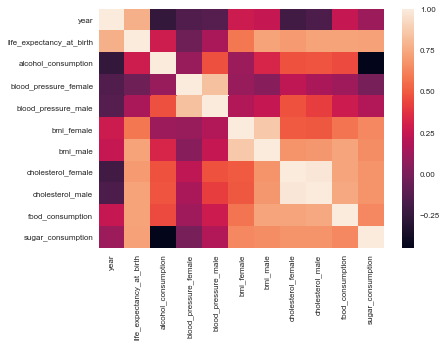

In [84]:
sns.heatmap(df4.corr())

TODO: imlement this with seaborn, not Excel

comments:

Wow, more fat in the blood seems good :) Visualize with world_scatter?

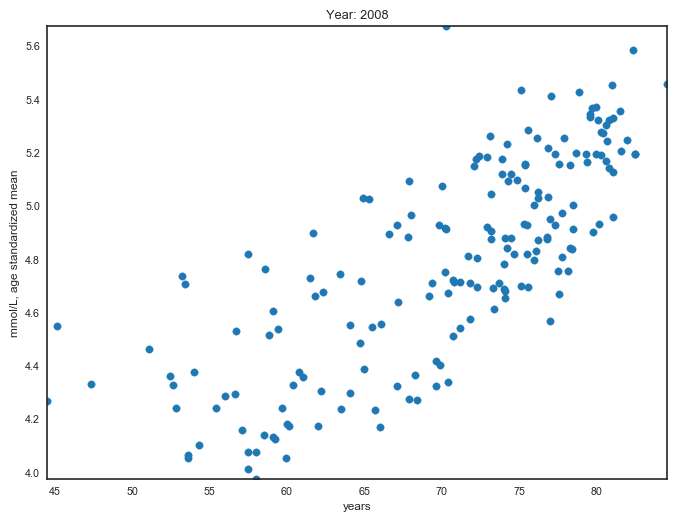

In [85]:
#need to re-work world_scatter as it uses df3 only as a global variable...
# ok, rewriten
# use 2008 as this is the last year with Cholesterol data

world_scatter(df4, 2008, "life_expectancy_at_birth", "cholesterol_female",
              "years",  "mmol/L, age standardized mean", "gap2008-life-cholesterol.jpeg")

Fig.: Life / Cholesterol

Clearly some relation here.  Carbs are bad :)

In [86]:
world_choro(2008, cholesterol_female, 'cholesterol-f.html', 'YlOrRd')

[3, 4, 4, 4, 5, 5]


visually matches Life expectancy at birgh, with some notable exceptions

In [87]:
df4[(df4['year'] == 2008)].nlargest(30, 'cholesterol_male')

country  year  life_expectancy_at_birth  \
42069               Iceland  2008                     82.40   
42057             Greenland  2008                     70.30   
42054               Germany  2008                     80.00   
41989               Andorra  2008                     84.60   
42094            Luxembourg  2008                     81.00   
42035               Denmark  2008                     78.90   
42050      French Polynesia  2008                     75.11   
42074               Ireland  2008                     80.10   
42179        United Kingdom  2008                     79.70   
42003               Belgium  2008                     79.60   
42126                Norway  2008                     80.80   
42048                France  2008                     81.10   
42118           Netherlands  2008                     80.30   
42076                 Italy  2008                     81.50   
42102                 Malta  2008                     80.70   
41996               Austria  2008                     80.40   
42163           Switzerland  2008                     82.00   
42006               Bermuda  2008                     77.10   
42134                Poland  2008                     75.40   
42149            Seychelles  2008                     72.90   
42033                Cyprus  2008                     80.00   
42157                 Spain  2008                     81.10   
42121           New Zealand  2008                     80.30   
42078                 Japan  2008                     82.50   
42135              Portugal  2008                     79.40   
42178  United Arab Emirates  2008                     75.60   
42047               Finland  2008                     79.60   
42153              Slovenia  2008                     78.70   
42137                 Qatar  2008                     77.90   
42151             Singapore  2008                     80.60   

       alcohol_consumption  blood_pressure_female  blood_pressure_male  \
42069                 7.38               118.7381             129.5866   
42057                  NaN               124.9943             133.1297   
42054                12.14               124.9044             132.8777   
41989                10.17               121.8377             131.5517   
42094                12.84               122.3705             130.9218   
42035                12.02               119.5815             129.7452   
42050                  NaN               123.9001             131.5403   
42074                14.92               124.7801             134.9432   
42179                13.24               124.0845             131.1873   
42003                10.41               121.8227             128.5194   
42126                 8.35               126.0266             134.5024   
42048                12.48               120.0146             131.0455   
42118                 9.75               121.6950             131.1626   
42076                 9.72               123.7030             130.9060   
42102                 4.10               124.1571             131.8274   
41996                12.40               124.1394             131.3600   
42163                11.41               119.6465             130.5664   
42006                  NaN               124.0230             133.5003   
42134                14.43               129.6765             134.9622   
42149                12.11               128.8337             135.8688   
42033                 8.84               122.6309             131.2014   
42157                11.83               122.0453             130.3884   
42121                 9.99               118.7421             127.2411   
42078                 7.79               121.9651             130.4549   
42135                13.89               127.2631             134.5676   
42178                 0.52               121.7369             128.1023   
42047                13.10               126.5645             135.28

Top 30 for most fat in the blood (Cholesterol, male this time)

Fatty food are rehabilitated for sure, confirm this from 2001-2002:

http://www.nytimes.com/2002/07/07/magazine/what-if-it-s-all-been-a-big-fat-lie.html

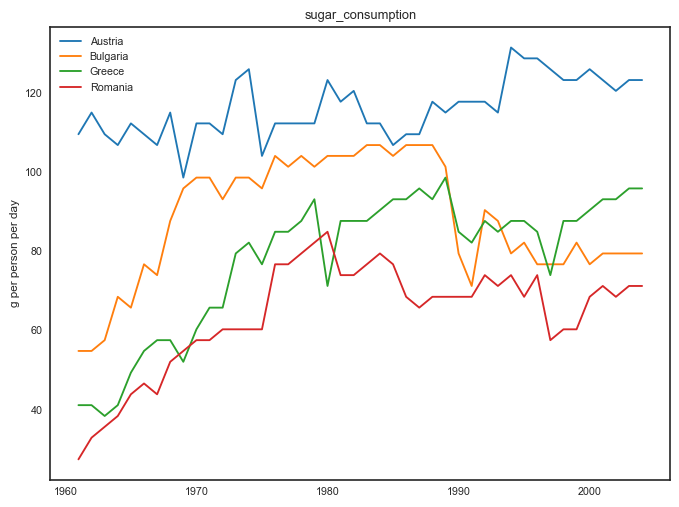

In [88]:
countries_plot(['Austria', 'Bulgaria', 'Greece', 'Romania'], sugar_consumption, "g per person per day")

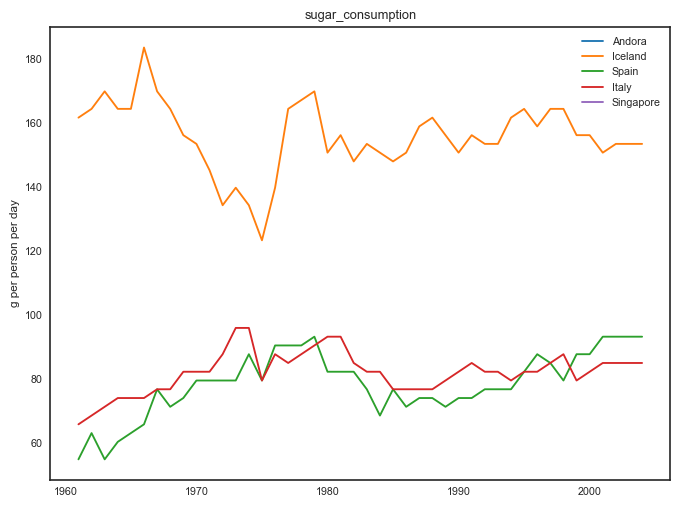

In [89]:
countries_plot(['Andora', 'Iceland', 'Spain', 'Italy', 'Singapore'], sugar_consumption, "g per person per day")

Can't prove the point for Sugar at this time.  Maybe if you live in cold climate, it's OK :)

In [90]:
world_choro(2008, alcohol_consumption, 'alco.html', 'BuPu')

[0, 4, 9, 13, 18, 23]


Fig. : World Alcohol consumption

Not good if we look at Eaststern Europe or Russia Life exp. data.

Have to re-check the CZ and SK data -- they drink a lot :)

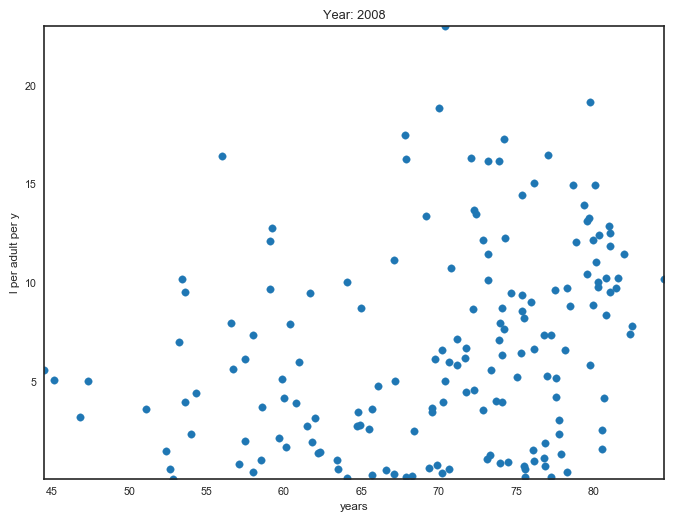

In [91]:
world_scatter(df4, 2008, "life_expectancy_at_birth", "alcohol_consumption",
              "years",  "l per adult per y", "gap2008-life-alco.jpeg")

Relation (if any) is not that obvious

## 3. ATUS Health Data
2014-16 Eating & Health Module Data

Question: **How do eating habits of US people influence their health?**



Read the manual:
ehmintcodebk1416.pdf

Select only some of these:

tucaseid,tulineno,eeincome1,
erbmi,erhhch,erincome,erspemch,ertpreat,ertseat,ethgt,etwgt,
eudietsoda,eudrink,eueat,
euexercise,euexfreq,eufastfd,
eufastfdfrq,euffyday,eufdsit,eufinlwgt,eusnap,
eugenhth,eugroshp,euhgt,euinclvl,euincome2,
eumeat,
eumilk,euprpmel,eusoda,eustores,eustreason,eutherm,euwgt,euwic,exincome1

In [92]:
#
selected_vars = ["erbmi", "eudrink", "euexfreq", "eufastfdfrq", "eugenhth", "eumeat", "eumilk", "ertpreat"]
# ERTPREAT
ehresp = pd.read_csv("ehresp_2014.csv", usecols= selected_vars)

In [93]:
ehresp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11212 entries, 0 to 11211
Data columns (total 8 columns):
erbmi          11212 non-null float64
ertpreat       11212 non-null int64
eudrink        11212 non-null int64
euexfreq       11212 non-null int64
eufastfdfrq    11212 non-null int64
eugenhth       11212 non-null int64
eumeat         11212 non-null int64
eumilk         11212 non-null int64
dtypes: float64(1), int64(7)
memory usage: 700.8 KB


In [94]:
ehresp.head()

erbmi  ertpreat  eudrink  euexfreq  eufastfdfrq  eugenhth  eumeat  \
0  33.200001        30        2        -1           -1         1       1   
1  22.700001        45        2        -1            1         2       1   
2  49.400002        60        1        -1           -1         5      -1   
3  -1.000000         0        1        -1           -1         2       2   
4  31.000000        65        1         5           -1         4       1   

   eumilk  
0       2  
1       2  
2      -1  
3       2  
4       2

In [95]:
ehresp.describe()

erbmi      ertpreat       eudrink      euexfreq   eufastfdfrq  \
count  11212.000000  11212.000000  11212.000000  11212.000000  11212.000000   
mean      26.291250     65.678113      1.325901      2.236621      1.132804   
std        8.737788     48.080541      0.480756      3.282512      2.485912   
min       -1.000000      0.000000     -3.000000     -3.000000     -2.000000   
25%       23.000000     30.000000      1.000000     -1.000000     -1.000000   
50%       26.500000     60.000000      1.000000      2.000000      1.000000   
75%       30.400000     90.000000      2.000000      4.000000      2.000000   
max       73.599998    508.000000      2.000000     38.000000     21.000000   

           eugenhth        eumeat        eumilk  
count  11212.000000  11212.000000  11212.000000  
mean       2.477167      0.529344      1.157867  
std        1.131729      0.985731      1.338405  
min       -3.000000     -2.000000     -3.000000  
25%        2.000000     -1.000000     -1.000000  
50%        2.000000      1.000000      2.000000  
75%        3.000000      1.000000      2.000000  
max        5.000000      2.000000      2.000000

In [96]:
#remove lines with missing BMI (height or weight is missing)
ehresp= ehresp[ehresp["erbmi"] > 0]


In [97]:
#ehresp.loc[ehresp['eudietsoda'] < 0]
#ehresp.loc[(ehresp["eudietsoda"] < 0), "eudietsoda"] = 0
# can't dismiss the 'don't know' or 'not sure' responses -- maybe work with 

In [98]:
#ehresp.loc[(ehresp["eufastfdfrq"] < 0), "eufastfdfrq"] = 0
#ehresp.loc[(ehresp["eugenhth"] < 0), "eugenhth"] = 0
#ehresp.loc[(ehresp["eugenhth"] < 0), "eugenhth"] = 0

In [99]:
ehresp[ehresp["eumeat"] < 0]

erbmi  ertpreat  eudrink  euexfreq  eufastfdfrq  eugenhth  eumeat  \
2      49.400002        60        1        -1           -1         5      -1   
5      30.700001        20        1         2            3         3      -1   
10     40.500000        35        1        -1            5         4      -1   
12     27.900000        25        1        -1            5         3      -1   
13     30.400000       150        1        -1           -1         3      -1   
14     26.799999         0        2        -1            1         2      -1   
15     32.900002        80        2        -1            3         3      -1   
18     35.200001        30        1        -1            2         2      -1   
24     34.299999        30        1        -1            2         4      -1   
25     29.100000        90        2        -1           -1         3      -1   
27     26.500000        90        2         7           -1         1      -1   
30     19.799999       130        1         1           -1         2      -1   
41     23.500000         5        1        -1            1         1      -1   
47     28.299999        45        1         5            4         4      -1   
49     23.700001        60        1        -1            2         4      -1   
50     23.500000        45        2         3            3         3      -1   
52     25.799999        85        2         7           -1         2      -1   
61     26.500000        40        2        -1            3         2      -1   
62     24.200001         0        2        -1            2         3      -1   
64     26.600000        70        1        -1           -1         3      -1   
66     29.500000        75        1         3            2         2      -1   
73     27.400000       120        1         2            3         2      -1   
77     26.600000        80        2         3           -1         3      -1   
90     21.100000       106        1         1            1         1      -1   
92     29.299999        60        1        -1           -1         2      -1   
94     30.700001        60        2         2            1         3      -1   
108    25.100000        85        1         4            2         2      -1   
112    33.200001       120        2         2            2         2      -1   
115    31.799999        25        2        -1            2         1      -1   
116    23.799999       135        1         1            1         2      -1   
...          ...       ...      ...       ...          ...       ...     ...   
11099  28.299999       180        1        -1           -1         1      -1   
11107  30.799999        90        1        -1            1         2      -1   
11110  25.700001       105        1         3           -1         1      -1   
11112  20.900000         0        1        -1            3         5      -1   
11115  24.400000       180        2         1           -1         3      -1   
11119  38.299999        45        1        -1           -1         3      -1   
11122  17.100000        40        2        -1            7         5      -1   
11136  29.000000       135        1         7           -1         3      -1   
11139  23.500000        45        1         4            2         2      -1   
11143  21.400000        15        2         6            4         2      -1   
11156  31.100000        15        2         7            2         1      -1   
11159  28.299999         0        2        -1            3         5      -1   
11164  34.200001        30        1         1           -1         3      -1   
11171  26.900000       120        2         1            1         3      -1   
11174  30.299999        30        2        -1            3         2      -1   
11175  21.700001        60        2         4           -1         3      -1   
11176  39.500000        30        1        -1           -1         5      -1   
11180  22.799999       135        2         2           -1         1      -1   
11181  50.2

1/3 of the total for most variables seem to be unknown.

In [100]:
ehresp.head()

erbmi  ertpreat  eudrink  euexfreq  eufastfdfrq  eugenhth  eumeat  \
0  33.200001        30        2        -1           -1         1       1   
1  22.700001        45        2        -1            1         2       1   
2  49.400002        60        1        -1           -1         5      -1   
4  31.000000        65        1         5           -1         4       1   
5  30.700001        20        1         2            3         3      -1   

   eumilk  
0       2  
1       2  
2      -1  
4       2  
5      -1

In [101]:
ehresp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10637 entries, 0 to 11211
Data columns (total 8 columns):
erbmi          10637 non-null float64
ertpreat       10637 non-null int64
eudrink        10637 non-null int64
euexfreq       10637 non-null int64
eufastfdfrq    10637 non-null int64
eugenhth       10637 non-null int64
eumeat         10637 non-null int64
eumilk         10637 non-null int64
dtypes: float64(1), int64(7)
memory usage: 747.9 KB


In [102]:
ehresp.corr()

erbmi  ertpreat   eudrink  euexfreq  eufastfdfrq  eugenhth  \
erbmi        1.000000 -0.059894 -0.007230 -0.133380     0.059121  0.296464   
ertpreat    -0.059894  1.000000  0.019677  0.056791     0.007596 -0.074348   
eudrink     -0.007230  0.019677  1.000000  0.013830    -0.100928 -0.004519   
euexfreq    -0.133380  0.056791  0.013830  1.000000    -0.018855 -0.229068   
eufastfdfrq  0.059121  0.007596 -0.100928 -0.018855     1.000000 -0.051292   
eugenhth     0.296464 -0.074348 -0.004519 -0.229068    -0.051292  1.000000   
eumeat      -0.005812 -0.038015 -0.037195  0.015602    -0.029985  0.013031   
eumilk       0.002309 -0.036410 -0.046128  0.017734    -0.041781  0.010825   

               eumeat    eumilk  
erbmi       -0.005812  0.002309  
ertpreat    -0.038015 -0.036410  
eudrink     -0.037195 -0.046128  
euexfreq     0.015602  0.017734  
eufastfdfrq -0.029985 -0.041781  
eugenhth     0.013031  0.010825  
eumeat       1.000000  0.952856  
eumilk       0.952856  1.000000

In [103]:
# remove instances with no valid answer for eudrink 
ehresp_full= ehresp[ehresp["eudrink"] > 0]

In [104]:
# remove instances with no valid answer for eumeat 
ehresp_full= ehresp_full[ehresp_full["eumeat"] > 0]

In [105]:
# add "obese" column, set obese to true if bmi above 30
ehresp_full["obese"] = 0
ehresp_full.loc[ehresp_full["erbmi"] > 30, "obese"] = 1

target = ehresp_full[(ehresp_full["obese"] == 1)]

In [106]:
ehresp_full.corr()

erbmi  ertpreat   eudrink  euexfreq  eufastfdfrq  eugenhth  \
erbmi        1.000000 -0.073286 -0.003513 -0.135200     0.060384  0.293065   
ertpreat    -0.073286  1.000000  0.012898  0.052843     0.016577 -0.072410   
eudrink     -0.003513  0.012898  1.000000  0.006927    -0.112878 -0.000771   
euexfreq    -0.135200  0.052843  0.006927  1.000000    -0.028470 -0.223922   
eufastfdfrq  0.060384  0.016577 -0.112878 -0.028470     1.000000 -0.058564   
eugenhth     0.293065 -0.072410 -0.000771 -0.223922    -0.058564  1.000000   
eumeat      -0.044697 -0.010315  0.048970 -0.002732     0.041453  0.017084   
eumilk      -0.018188  0.007971 -0.003260  0.012674    -0.008389  0.002169   
obese        0.782946 -0.057870  0.003750 -0.115417     0.056296  0.263730   

               eumeat    eumilk     obese  
erbmi       -0.044697 -0.018188  0.782946  
ertpreat    -0.010315  0.007971 -0.057870  
eudrink      0.048970 -0.003260  0.003750  
euexfreq    -0.002732  0.012674 -0.115417  
eufastfdfrq  0.041453 -0.008389  0.056296  
eugenhth     0.017084  0.002169  0.263730  
eumeat       1.000000  0.001730 -0.032877  
eumilk       0.001730  1.000000 -0.016635  
obese       -0.032877 -0.016635  1.000000

comments

Nothing here...

In [107]:
target.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2190 entries, 0 to 11203
Data columns (total 9 columns):
erbmi          2190 non-null float64
ertpreat       2190 non-null int64
eudrink        2190 non-null int64
euexfreq       2190 non-null int64
eufastfdfrq    2190 non-null int64
eugenhth       2190 non-null int64
eumeat         2190 non-null int64
eumilk         2190 non-null int64
obese          2190 non-null int64
dtypes: float64(1), int64(8)
memory usage: 171.1 KB


In [108]:
target.corr()

erbmi  ertpreat   eudrink  euexfreq  eufastfdfrq  eugenhth  \
erbmi        1.000000 -0.067596 -0.038956 -0.085443     0.003806  0.190937   
ertpreat    -0.067596  1.000000 -0.018075  0.054875     0.032046 -0.029914   
eudrink     -0.038956 -0.018075  1.000000  0.010835    -0.136958 -0.013487   
euexfreq    -0.085443  0.054875  0.010835  1.000000    -0.045995 -0.155046   
eufastfdfrq  0.003806  0.032046 -0.136958 -0.045995     1.000000 -0.062333   
eugenhth     0.190937 -0.029914 -0.013487 -0.155046    -0.062333  1.000000   
eumeat       0.003411 -0.025212  0.063360 -0.013473     0.072319  0.015397   
eumilk       0.014937 -0.002934 -0.008640  0.000092    -0.011196  0.039126   
obese             NaN       NaN       NaN       NaN          NaN       NaN   

               eumeat    eumilk  obese  
erbmi        0.003411  0.014937    NaN  
ertpreat    -0.025212 -0.002934    NaN  
eudrink      0.063360 -0.008640    NaN  
euexfreq    -0.013473  0.000092    NaN  
eufastfdfrq  0.072319 -0.011196    NaN  
eugenhth     0.015397  0.039126    NaN  
eumeat       1.000000 -0.028531    NaN  
eumilk      -0.028531  1.000000    NaN  
obese             NaN       NaN    NaN

still nothing that obvious / striking

In [109]:
import statsmodels.api as sm
from statsmodels.graphics.gofplots import ProbPlot

/Users/oggy/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [110]:
# TODO: check for a newer version of the statmodels

In [111]:
# set input and output variables to use in regression model
x = ehresp_full[['eufastfdfrq', 'euexfreq', 'eudrink', 'ertpreat']]#, 'eumeat', 'eumilk']]
y = ehresp_full['erbmi']

# add intercept to input variable
x = sm.add_constant(x)

# fit regression model
model = sm.OLS(y, x).fit()

In [112]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  erbmi   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     51.07
Date:                Sat, 10 Mar 2018   Prob (F-statistic):           1.70e-42
Time:                        13:54:10   Log-Likelihood:                -24619.
No. Observations:                7649   AIC:                         4.925e+04
Df Residuals:                    7644   BIC:                         4.928e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          28.6512      0.237    121.015      0.000      28.187      29.115
eufastfdfrq     0.1468      0.029      5.133      0.000       0.091       0.203
euexfreq       -0.2401      0.021    -11.496      0.000      -0.281      -0.199
eudrink         0.0641      0.150      0.426      0.670      -0.231       0.359
ertpreat       -0.0086      0.001     -5.965      0.000      -0.011      -0.006
==============================================================================
Omnibus:                     1717.470   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4357.625
Skew:                           1.223   Prob(JB):                         0.00
Kurtosis:                       5.773   Cond. No.                         316.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [113]:
print('Parameters: ', model.params)
print('R2: ', model.rsquared)

Parameters:  const          28.651168
eufastfdfrq     0.146791
euexfreq       -0.240120
eudrink         0.064105
ertpreat       -0.008646
dtype: float64
R2:  0.0260262154066


Comments

Model is not good: can't fit these vars with OLS.  More proof below :)

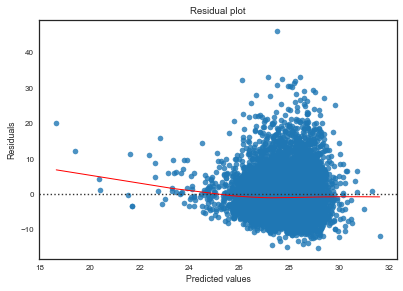

In [114]:
# seaborn residual plot
sns.residplot(model.fittedvalues, ehresp_full['erbmi'], lowess=True, line_kws={'color':'r', 'lw':1})
plt.title('Residual plot')
plt.xlabel('Predicted values')
plt.ylabel('Residuals');

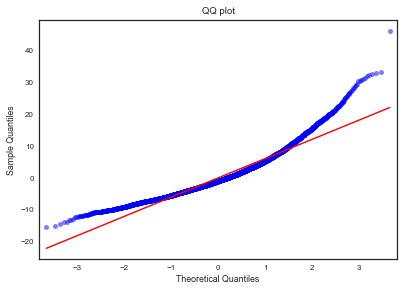

In [115]:
# statsmodels Q-Q plot on model residuals
QQ = ProbPlot(model.resid)
fig = QQ.qqplot(alpha=0.5, markersize=5, line='s')
plt.title('QQ plot');

In [116]:
model2 = sm.GLM(y, x, family=sm.families.Gaussian()).fit()

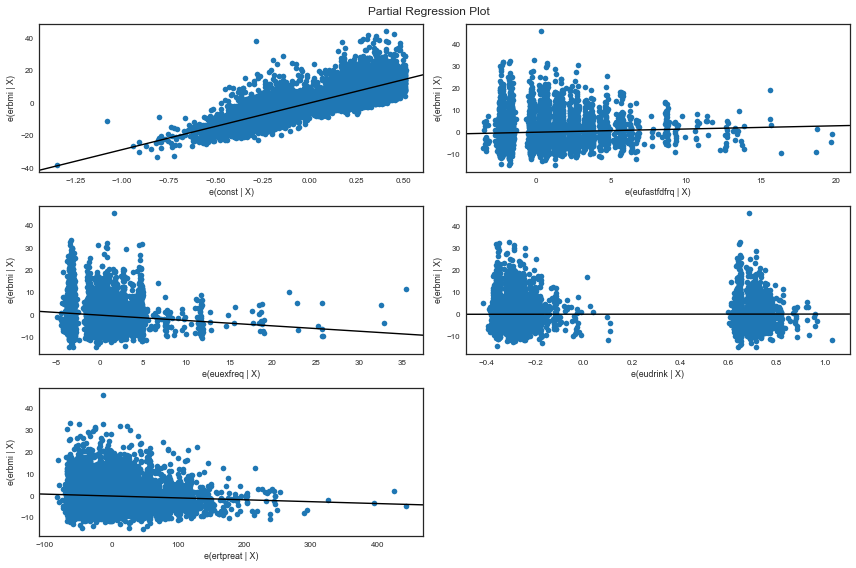

In [117]:
# added variable plots
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(model, fig=fig)

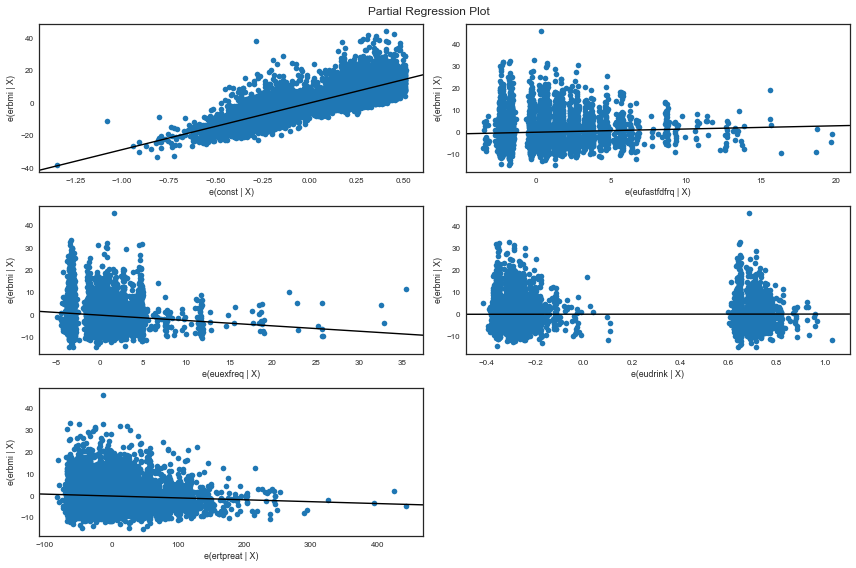

In [118]:
# added variable plots
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(model2, fig=fig)

The variable eudrink seems rather discrete.  After revisiting the Description manual, for eudrink 2 means none, so maybe it's more appropriate to change 2 --> 0 and leave 1 as is.

All in all I can't say any of the selected variables correlates strongly with respondents BMI.  3.1

[1.1] A Statistical Analysis of Infant Mortality and Carbon Dioxide, https://ds.lclark.edu/jessesimpson/2014/09/a-statistical-analysis-of-infant-mortality-and-carbon-dioxide/

[1.2] On the causal link between carbon dioxide and air pollution mortality - Jacobson - 2008 - Geophysical Research Letters - Wiley Online Library http://onlinelibrary.wiley.com/doi/10.1029/2007GL031101/full

[1.3] CO₂ and other Greenhouse Gas Emissions - Our World in Data https://ourworldindata.org/co2-and-other-greenhouse-gas-emissions

[1.4] http://www.who.int/globalchange/resources/country-profiles/climatechange_global_overview.pdf

[1.5] https://www.ucsusa.org/global-warming/science-and-impacts/science/each-countrys-share-of-co2.html#.WkuQl7T1UWo

[1.6] The Python Graph Galler, Holtz, Y., https://python-graph-gallery.com/341-python-gapminder-animation/

[1.7] Three ways to make a choropleth, Fernandes,F., https://ocefpaf.github.io/python4oceanographers/blog/2015/08/24/choropleth/

[1.8] World countries geoJSON (modified to match the Gapminder names): https://github.com/johan/world.geo.json

[1.9] http://www.sbaloncology.bg/assets/files/rakov_registar/Cancer_incidence_BG_2011.pdf

[2.1] Why we get Fat AND Hungry | (Biology of Weight Gain & Low-Carb ) https://youtu.be/KHaCKudtVi0

[2.2] Python | The Budding Data Scientist, https://buddingdatascientist.wordpress.com/tag/python/

[3.1] https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3199736/

[3.2] https://link.springer.com/article/10.1007/s11205-010-9655-y

[3.3] https://www.kaggle.com/rtatman/regression-challenge-day-4
